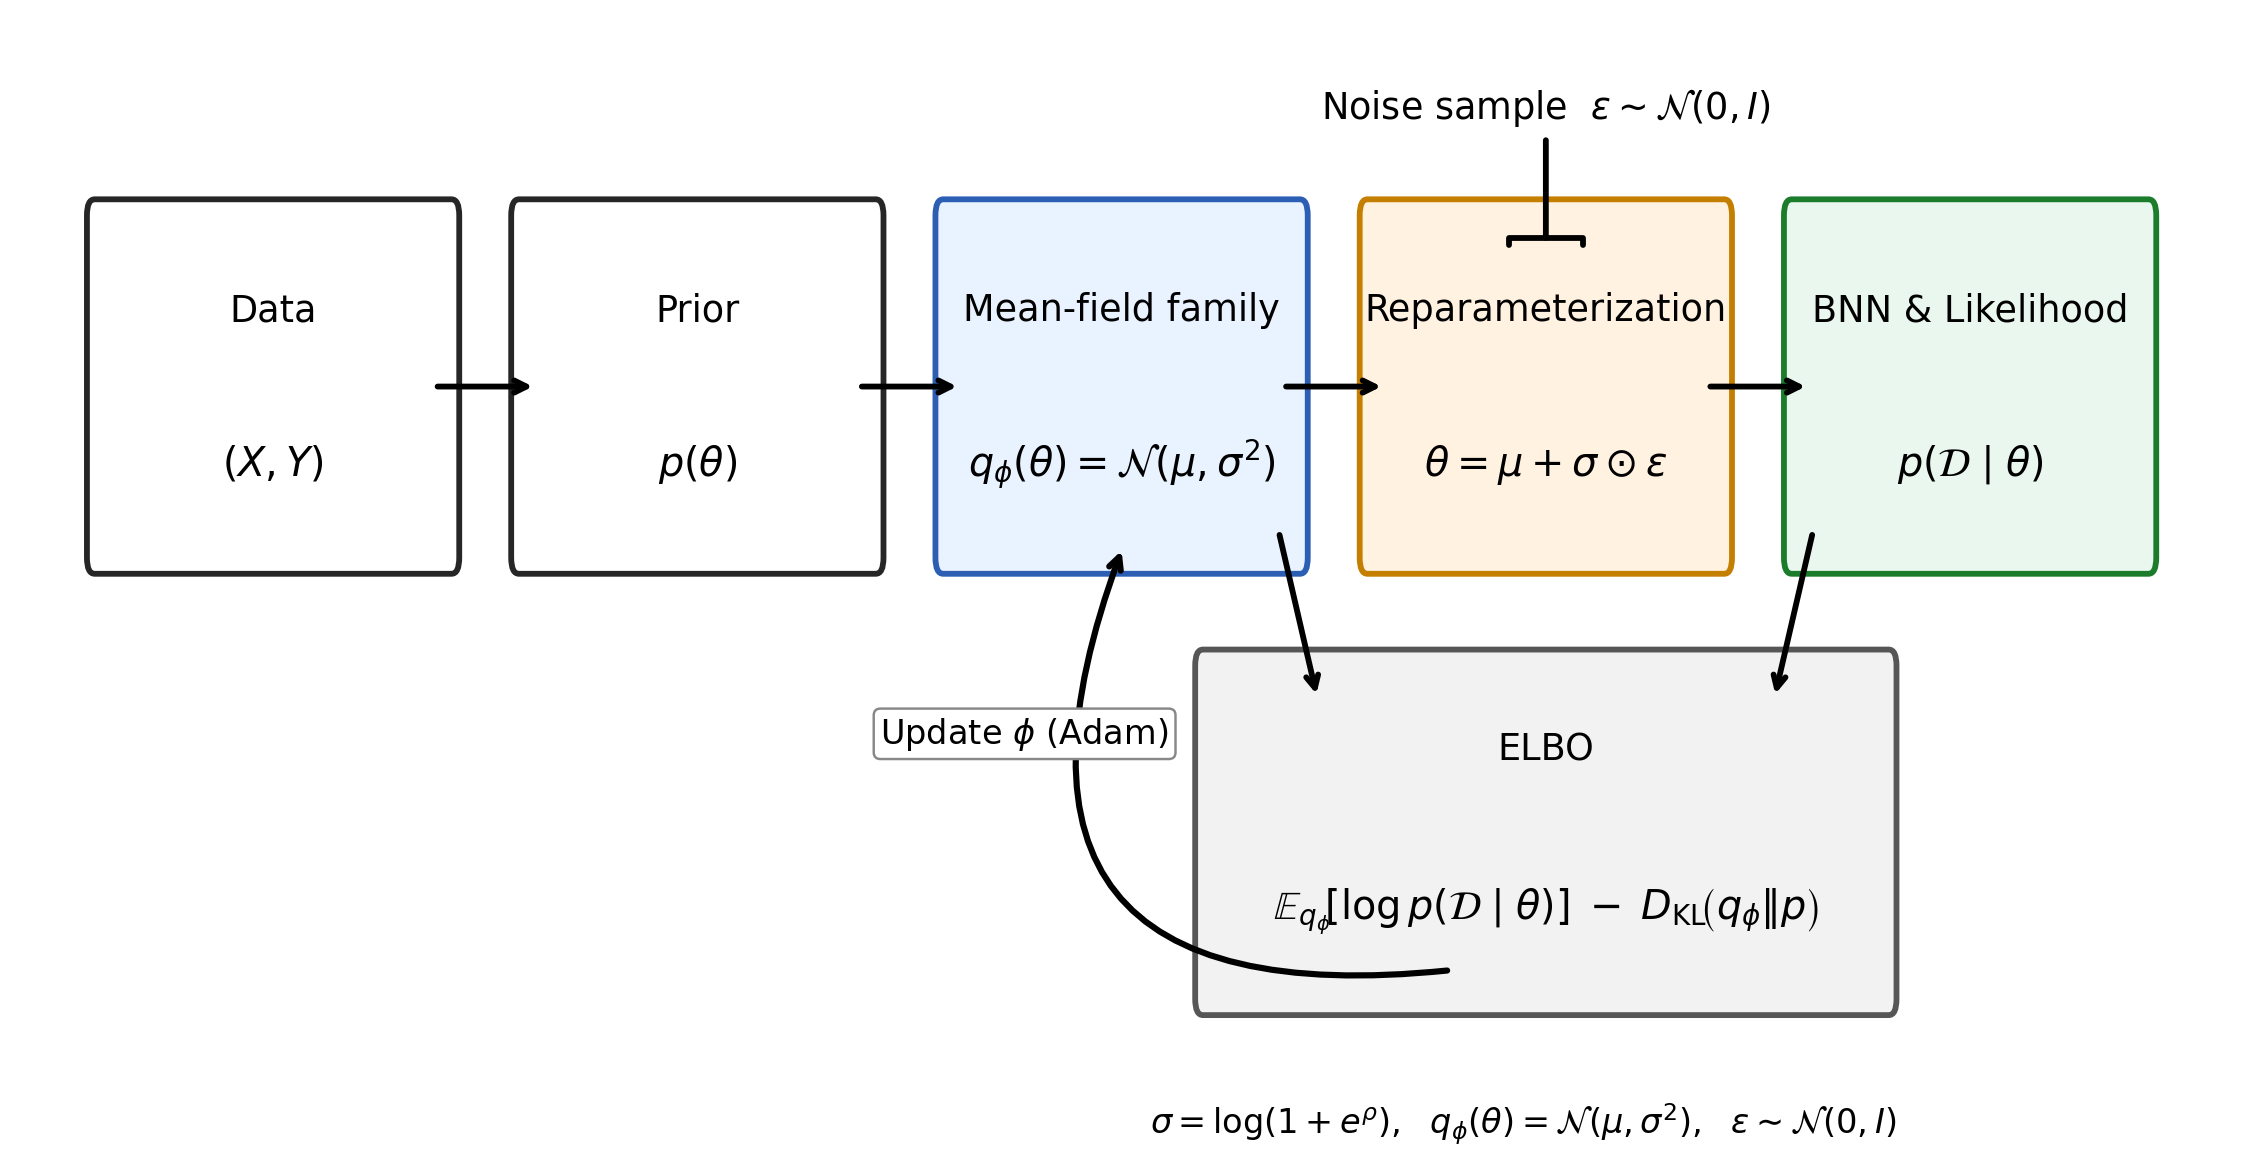

Saved: vi_bnn_diagram_en_45deg.png & vi_bnn_diagram_en_45deg.svg


In [42]:
# --- Clean VI diagram for BNN (English, 45° feed arrows) ---
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# ===== Layout =====
FIG_W, FIG_H, DPI = 13, 6, 220
W, H       = 3.8, 1.6            # width/height of top row boxes
GAPX       = 1.10                # horizontal gap between boxes
Y_TOP      = 3.85                # y-center of top row
Y_BOT      = 1.35                # y-center of ELBO box
W_ELBO     = 7.6                 # ELBO width (a bit wider)
H_ELBO     = 1.55                # ELBO height
FS_T, FS_M = 12, 13              # title / math fonts
LW, RADIUS = 1.9, 0.09

# x centers of 5 top boxes
cx = []
x0 = 1.0 + W/2
for i in range(5):
    cx.append(x0 + i * (W + GAPX))
x_data, x_prior, x_q, x_rep, x_like = cx
cy_top, cy_bot = Y_TOP, Y_BOT

fig, ax = plt.subplots(figsize=(FIG_W, FIG_H), dpi=DPI)
ax.set_xlim(0, cx[-1] + W/2 + 1.2)
ax.set_ylim(0.2, 5.9)
ax.axis("off")

def box(cx, cy, w, h, fc, ec, title, math=""):
    x = cx - w/2
    y = cy - h/2
    ax.add_patch(patches.FancyBboxPatch(
        (x, y), w, h,
        boxstyle=f"round,pad=0.25,rounding_size={RADIUS}",
        facecolor=fc, edgecolor=ec, linewidth=LW))
    ax.text(cx, cy + 0.27*h, title, ha="center", va="center", fontsize=FS_T)
    if math:
        ax.text(cx, cy - 0.27*h, math, ha="center", va="center", fontsize=FS_M)

def arrow(p, q, curve=0.0, lw=LW):
    ax.annotate("", xy=q, xytext=p,
                arrowprops=dict(arrowstyle="->", lw=lw,
                                connectionstyle=f"arc3,rad={curve}",
                                shrinkA=0, shrinkB=0))

# Colors
C_PRI       = "#262626"
FC_Q, EC_Q  = "#e9f2ff", "#2c5fb3"
FC_RE, EC_RE= "#fff2e0", "#c47f00"
FC_LI, EC_LI= "#eaf7ee", "#1b7d2b"
FC_EL, EC_EL= "#f2f2f2", "#565656"

# ---- Top row ----
box(x_data,  cy_top, W, H, "#ffffff", C_PRI, "Data", r"$(X, Y)$")
box(x_prior, cy_top, W, H, "#ffffff", C_PRI, "Prior", r"$p(\theta)$")
box(x_q,     cy_top, W, H, FC_Q, EC_Q, "Mean-field family",
    r"$q_{\phi}(\theta)=\mathcal{N}(\mu,\sigma^{2})$")
box(x_rep,   cy_top, W, H, FC_RE, EC_RE, "Reparameterization",
    r"$\theta=\mu+\sigma\odot\varepsilon$")
box(x_like,  cy_top, W, H, FC_LI, EC_LI, "BNN & Likelihood",
    r"$p(\mathcal{D}\mid\theta)$")

# epsilon bracket above reparam
ax.annotate(r"Noise sample  $\varepsilon\sim\mathcal{N}(0,I)$",
            xy=(x_rep, cy_top + H/2), xytext=(x_rep, cy_top + H/2 + 0.65),
            ha='center', va='bottom', fontsize=FS_T,
            arrowprops=dict(arrowstyle='-[', lw=LW))

# ---- ELBO box ----
x_elbo = (x_q + x_like) / 2
x_elbo_left  = x_elbo - W_ELBO/2
x_elbo_right = x_elbo + W_ELBO/2
y_elbo_top   = cy_bot + H_ELBO/2

ax.add_patch(patches.FancyBboxPatch(
    (x_elbo_left, cy_bot - H_ELBO/2), W_ELBO, H_ELBO,
    boxstyle=f"round,pad=0.25,rounding_size={RADIUS}",
    facecolor=FC_EL, edgecolor=EC_EL, linewidth=LW))
ax.text(x_elbo, cy_bot + 0.30*H_ELBO, "ELBO",
        ha='center', va='center', fontsize=FS_T)
ax.text(x_elbo, cy_bot - 0.28*H_ELBO,
        r"$\mathbb{E}_{q_\phi}\!\left[\log p(\mathcal{D}\mid\theta)\right]"
        r"\;-\;D_{\mathrm{KL}}\!\left(q_\phi\Vert p\right)$",
        ha='center', va='center', fontsize=FS_M)

# ---- Main flow (top row) ----
for L, R in [(x_data,x_prior),(x_prior,x_q),(x_q,x_rep),(x_rep,x_like)]:
    arrow((L + W/2, cy_top), (R - W/2, cy_top))

# ---- Diagonal (≈45°) feeds into ELBO ----
# From Mean-field (blue) -> ELBO (top-left corner)
start_blue = (x_q + 0.48*W, cy_top - 0.52*H)          # near bottom-right of blue box
end_blue   = (x_elbo_left + 1.15, y_elbo_top)         # near top-left of ELBO
arrow(start_blue, end_blue, curve=0.0)

# From BNN (green) -> ELBO (top-right corner)
start_green = (x_like - 0.48*W, cy_top - 0.52*H)      # near bottom-left of green box
end_green   = (x_elbo_right - 1.15, y_elbo_top)       # near top-right of ELBO
arrow(start_green, end_green, curve=0.0)

# ---- Feedback: ELBO -> q_phi (update phi with Adam) ----
fb_start = (x_elbo - 0.15*W_ELBO, cy_bot - H_ELBO/2)  # bottom edge of ELBO
fb_end   = (x_q, cy_top - H/2 - 0.12)                 # up to under the blue box
arrow(fb_start, fb_end, curve=-0.8, lw=LW+0.12)
# Put the label near the mid of the feedback curve
ax.text((fb_start[0]+fb_end[0])/2 - 3,
        (fb_start[1]+fb_end[1])/2 + 0.15,
        r"Update $\phi$ (Adam)", fontsize=FS_T-1,
        ha="center", va="center",
        bbox=dict(boxstyle="round,pad=0.2", fc="white", ec="#888", lw=0.8))

# ---- Caption (optional) ----
plt.figtext(0.65, 0.045,
            r"$\sigma=\log(1+e^{\rho}),\ \ "
            r"q_\phi(\theta)=\mathcal{N}(\mu,\sigma^2),\ \ "
            r"\varepsilon\sim\mathcal{N}(0,I)$",
            ha='center', va='center', fontsize=11)

plt.savefig("vi_bnn_diagram_en_45deg.png", dpi=300, bbox_inches="tight")
plt.savefig("vi_bnn_diagram_en_45deg.svg", dpi=300, bbox_inches="tight")
plt.show()

print("Saved: vi_bnn_diagram_en_45deg.png & vi_bnn_diagram_en_45deg.svg")


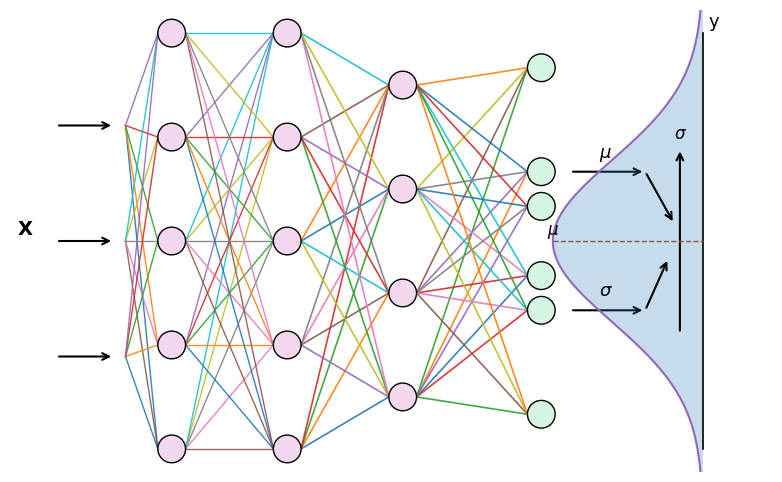

✅ ذخیره شد: bnn_schematic.png و bnn_schematic.pdf


In [3]:
# -*- coding: utf-8 -*-
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Circle, FancyArrowPatch, Polygon
from matplotlib.collections import PatchCollection

# --- توابع کمکی ---
def layer_nodes(x, y_center, n, vspace=0.9, r=0.12):
    ys = np.linspace(y_center - (n-1)*vspace/2, y_center + (n-1)*vspace/2, n)
    return [(x, y, r) for y in ys]

def connect_layers(ax, nodes_left, nodes_right, lw=1.2, alpha=0.9, style="-"):
    for (x1, y1, r1) in nodes_left:
        for (x2, y2, r2) in nodes_right:
            ax.plot([x1+r1, x2-r2], [y1, y2], style, lw=lw, alpha=alpha)

def draw_nodes(ax, nodes, facecolor=None, edgecolor="k", zorder=3):
    patches = [Circle((x, y), r) for (x, y, r) in nodes]
    pc = PatchCollection(patches, facecolor=facecolor, edgecolor=edgecolor, linewidth=1.0, zorder=zorder)
    ax.add_collection(pc)

def arrow(ax, xy_from, xy_to, **kwargs):
    arr = FancyArrowPatch(posA=xy_from, posB=xy_to, arrowstyle="->", mutation_scale=12, lw=1.5, **kwargs)
    ax.add_patch(arr)

# --- تنظیم لایه‌ها ---
fig, ax = plt.subplots(figsize=(12, 6))

# ورودی‌ها
x_input = -4.2
input_targets = [(-3.6,  1.0, 0.0), (-3.6,  0.0, 0.0), (-3.6, -1.0, 0.0)]
for y in [1.0, 0.0, -1.0]:
    arrow(ax, (x_input, y), (-3.7, y))
ax.text(x_input-0.2, 0.05, "X", fontsize=14, fontweight="bold", ha="right")

# لایه‌ها
L1  = layer_nodes(-3.2, 0.0, n=5)
L2  = layer_nodes(-2.2, 0.0, n=5)
L3  = layer_nodes(-1.2, 0.0, n=4)
Lmu = layer_nodes( 0.0, 0.6, n=3)
Lsg = layer_nodes( 0.0,-0.6, n=3)

# رسم نودها
draw_nodes(ax, L1,  facecolor="#f2d7ee")
draw_nodes(ax, L2,  facecolor="#f2d7ee")
draw_nodes(ax, L3,  facecolor="#f2d7ee")
draw_nodes(ax, Lmu, facecolor="#d5f5e3")
draw_nodes(ax, Lsg, facecolor="#d5f5e3")

# اتصال لایه‌ها
connect_layers(ax, input_targets, L1, lw=1.0)
connect_layers(ax, L1, L2, lw=1.0)
connect_layers(ax, L2, L3, lw=1.2)
connect_layers(ax, L3, Lmu, lw=1.2)
connect_layers(ax, L3, Lsg, lw=1.2)

# خروجی‌ها
for y in [0.6, -0.6]:
    arrow(ax, (0.25, y), (0.9, y))
ax.text(0.5, 0.72, r"$\mu$", fontsize=13)
ax.text(0.5, -0.48, r"$\sigma$", fontsize=13)

# --- پنل توزیع گاوسی ---
ax.plot([1.4, 1.4], [-1.8, 1.8], lw=1.2, color="k")
ax.text(1.45, 1.85, "y", fontsize=13)

xs = np.linspace(-2, 2, 400)
mu, s = 0.0, 0.7
pdf = np.exp(-0.5 * ((xs - mu)/s)**2) / (s*np.sqrt(2*np.pi))
pdf = (pdf / pdf.max()) * 1.3
curve_x = 1.4 - pdf
ax.plot(curve_x, xs, lw=1.5)
verts = np.vstack([np.c_[curve_x, xs], np.array([[1.4, xs[-1]]]), np.array([[1.4, xs[0]]])])
ax.add_patch(Polygon(verts, closed=True, alpha=0.25))

# خط میانگین و انحراف معیار
ax.plot([1.4-1.3, 1.4], [0, 0], ls="--", lw=1.0)
ax.text(1.4-1.35, 0.05, r"$\mu$", fontsize=12)
arrow(ax, (1.4-0.2, -0.8), (1.4-0.2, 0.8))
ax.text(1.4-0.25, 0.88, r"$\sigma$", fontsize=12)

# لینک هدها به توزیع
arrow(ax, (0.9, 0.6), (1.15, 0.15))
arrow(ax, (0.9, -0.6), (1.1, -0.15))

# عنوان
#ax.text(-3.3, 1.8, "Bayesian Neural Network with dual heads (mean & uncertainty)", fontsize=14, fontweight="bold")

# تنظیمات نهایی
ax.set_aspect("equal")
ax.set_xlim(-4.6, 2.0)
ax.set_ylim(-2.0, 2.0)
ax.axis("off")

# ذخیره خروجی‌ها
plt.savefig("bnn_schematic.png", dpi=300, bbox_inches="tight")
plt.savefig("bnn_schematic.pdf", bbox_inches="tight")
plt.show()

print("✅ ذخیره شد: bnn_schematic.png و bnn_schematic.pdf")


In [ ]:
# -*- coding: utf-8 -*-
# ✅ Colab-ready: رسم شبکه عصبی کلاسیک (ANN) با برچسب‌های فارسی صحیح

# 1) نصب ابزارهای فارسی‌نویسی و افزودن فونت فارسی
!pip -q install arabic-reshaper python-bidi
# فونت Vazirmatn (خوانا و رایگان). اگر به اینترنت دسترسی ندارید، یک ttf فارسی در Colab آپلود کنید و مسیرش را جایگزین کنید.
!wget -q https://github.com/rastikerdar/vazirmatn/releases/download/v33.003/Vazirmatn-FD-UI-Regular.ttf -O /usr/local/share/fonts/Vazirmatn.ttf
!fc-cache -f -v >/dev/null


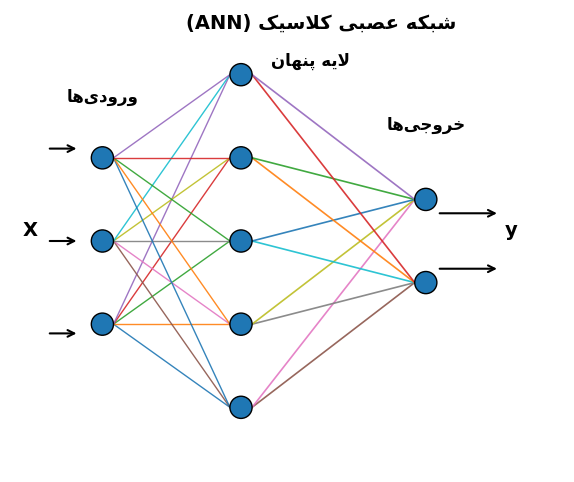

✅ ذخیره شد: /content/ann_schematic_fa.png و /content/ann_schematic_fa.pdf


In [6]:

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Circle, FancyArrowPatch
from matplotlib.collections import PatchCollection
import matplotlib as mpl
import arabic_reshaper
from bidi.algorithm import get_display

# تنظیم فونت فارسی برای matplotlib
mpl.rcParams['font.family'] = 'Vazirmatn'
mpl.rcParams['font.size'] = 12

# کمک‌تابع برای ترسیم متن فارسی (رفع مشکل برعکس/جداجدا)
def fa(text):
    return get_display(arabic_reshaper.reshape(text))

# --- توابع کمکی ترسیم ---
def layer_nodes(x, y_center, n, vspace=0.9, r=0.12):
    ys = np.linspace(y_center - (n-1)*vspace/2, y_center + (n-1)*vspace/2, n)
    return [(x, y, r) for y in ys]

def connect_layers(ax, nodes_left, nodes_right, lw=1.2, alpha=0.9):
    for (x1, y1, r1) in nodes_left:
        for (x2, y2, r2) in nodes_right:
            ax.plot([x1+r1, x2-r2], [y1, y2], '-', lw=lw, alpha=alpha)

def draw_nodes(ax, nodes, facecolor=None, edgecolor="k", zorder=3):
    patches = [Circle((x, y), r) for (x, y, r) in nodes]
    pc = PatchCollection(patches, facecolor=facecolor, edgecolor=edgecolor, linewidth=1.0, zorder=zorder)
    ax.add_collection(pc)

def arrow(ax, xy_from, xy_to, **kwargs):
    arr = FancyArrowPatch(posA=xy_from, posB=xy_to, arrowstyle="->", mutation_scale=12, lw=1.5, **kwargs)
    ax.add_patch(arr)

# --- پیکربندی شکل ANN ---
fig, ax = plt.subplots(figsize=(10, 6))

# ورودی‌ها (فلش‌های X سمت چپ)
x_input = -3.6
input_targets = [(-3.2,  1.0, 0.0), (-3.2,  0.0, 0.0), (-3.2, -1.0, 0.0)]
for y in [1.0, 0.0, -1.0]:
    arrow(ax, (x_input, y), (-3.25, y))
ax.text(x_input-0.1, 0.05, "X", fontsize=14, fontweight="bold", ha="right")

# لایه‌ها
L_in  = layer_nodes(-3.0, 0.0, n=3)
L_hid = layer_nodes(-1.5, 0.0, n=5)
L_out = layer_nodes( 0.5, 0.0, n=2)

# رسم نودها (بدون تعیین رنگ خاص؛ پیش‌فرض matplotlib)
draw_nodes(ax, L_in)
draw_nodes(ax, L_hid)
draw_nodes(ax, L_out)

# اتصالات
connect_layers(ax, L_in,  L_hid, lw=1.0)
connect_layers(ax, L_hid, L_out, lw=1.2)

# برچسب لایه‌ها (فارسی درست)
ax.text(-3.0,  1.5, fa("ورودی‌ها"), fontsize=12, ha="center", fontweight="bold")
ax.text(-0.75,  1.9, fa("لایه پنهان"), fontsize=12, ha="center", fontweight="bold")
ax.text( 0.5,  1.2, fa("خروجی‌ها"), fontsize=12, ha="center", fontweight="bold")

# خروجی‌ها (فلش‌های y سمت راست)
for y in [-0.3, 0.3]:
    arrow(ax, (0.62, y), (1.3, y))
ax.text(1.35, 0.05, "y", fontsize=14, fontweight="bold")

# عنوان شکل (فارسی)
ax.text(-2.1, 2.3, fa("شبکه عصبی کلاسیک (ANN)"), fontsize=14, fontweight="bold")

# تنظیمات نهایی
ax.set_aspect("equal")
ax.set_xlim(-4, 2)
ax.set_ylim(-2.5, 2.5)
ax.axis("off")

plt.savefig("/content/ann_schematic_fa.png", dpi=300, bbox_inches="tight")
plt.savefig("/content/ann_schematic_fa.pdf", bbox_inches="tight")
plt.show()

print("✅ ذخیره شد: /content/ann_schematic_fa.png و /content/ann_schematic_fa.pdf")


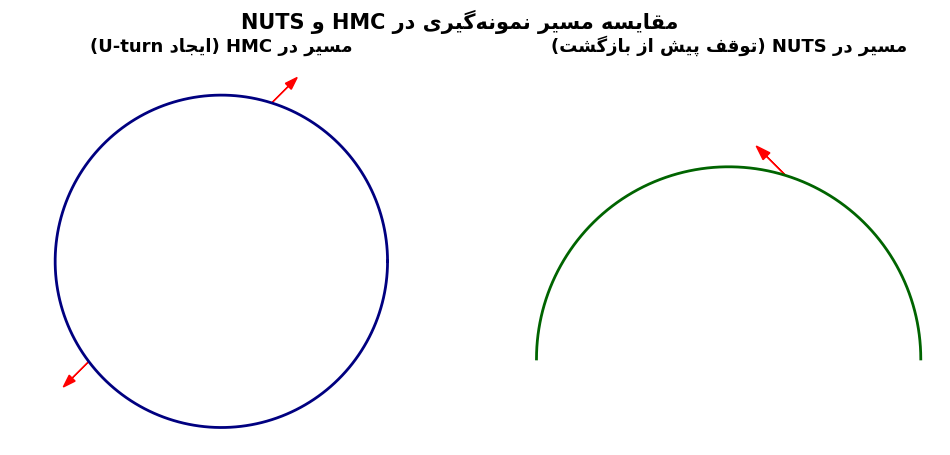

In [7]:
# -*- coding: utf-8 -*-
!pip -q install arabic-reshaper python-bidi
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import arabic_reshaper
from bidi.algorithm import get_display

# کمک‌تابع برای فارسی
mpl.rcParams['font.family'] = 'Vazirmatn'
def fa(text): return get_display(arabic_reshaper.reshape(text))

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# --- مسیر HMC (U-turn) ---
t = np.linspace(0, 2*np.pi, 200)
x = np.cos(t)
y = np.sin(t)

axes[0].plot(x, y, lw=2, color="navy")
axes[0].arrow(x[40], y[40], 0.1, 0.1, head_width=0.05, color="red")
axes[0].arrow(x[120], y[120], -0.1, -0.1, head_width=0.05, color="red")
axes[0].set_title(fa("مسیر در HMC (ایجاد U-turn)"), fontsize=13, fontweight="bold")
axes[0].axis("equal"); axes[0].axis("off")

# --- مسیر NUTS (بدون U-turn) ---
t2 = np.linspace(0, np.pi, 100)
x2 = np.cos(t2)
y2 = np.sin(t2)

axes[1].plot(x2, y2, lw=2, color="darkgreen")
axes[1].arrow(x2[40], y2[40], -0.1, 0.1, head_width=0.05, color="red")
axes[1].set_title(fa("مسیر در NUTS (توقف پیش از بازگشت)"), fontsize=13, fontweight="bold")
axes[1].axis("equal"); axes[1].axis("off")

plt.suptitle(fa("مقایسه مسیر نمونه‌گیری در HMC و NUTS"), fontsize=15, fontweight="bold")
plt.savefig("/content/nuts_vs_hmc.png", dpi=300, bbox_inches="tight")
plt.show()


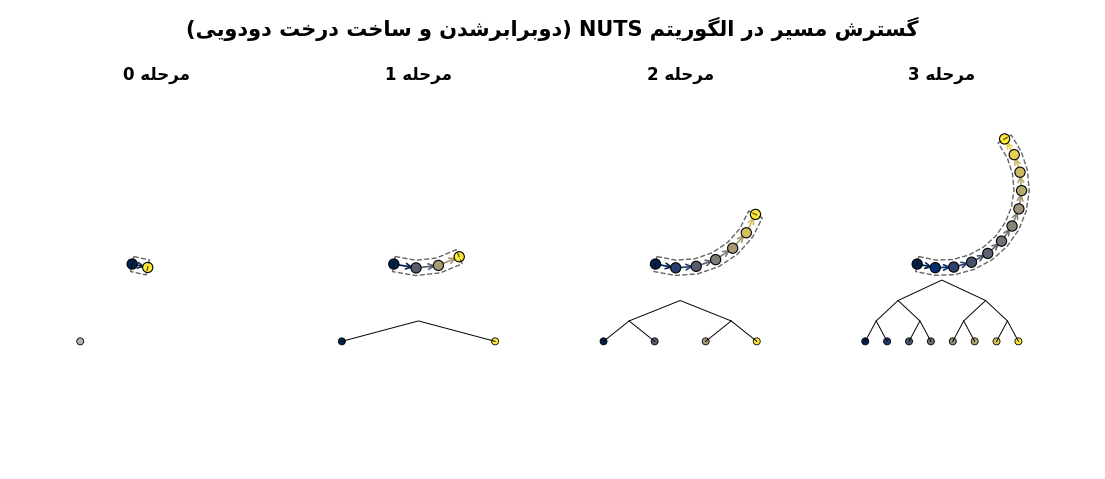

Saved to /content/nuts_path_extension.(png,pdf)


In [8]:
# -*- coding: utf-8 -*-
# NUTS Path Extension (Doubling) – Colab ready with Persian labels

# نصب ابزارهای فارسی‌نویسی و فونت
!pip -q install arabic-reshaper python-bidi
!wget -q https://github.com/rastikerdar/vazirmatn/releases/download/v33.003/Vazirmatn-FD-UI-Regular.ttf -O /usr/local/share/fonts/Vazirmatn.ttf
!fc-cache -f -v >/dev/null

import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.patches import Circle, FancyArrowPatch
import arabic_reshaper
from bidi.algorithm import get_display

mpl.rcParams["font.family"] = "Vazirmatn"
mpl.rcParams["font.size"] = 12

def fa(t):  # متن فارسی درست (RTL)
    return get_display(arabic_reshaper.reshape(t))

def arrow(ax, a, b, **kw):
    ax.add_patch(FancyArrowPatch(a, b, arrowstyle="->", mutation_scale=10, lw=1.2, **kw))

def draw_path_stage(ax, center, R, theta_max, n_pts, cmap):
    """رسم مسیر NUTS تا عمق/مرحله مشخص (theta_max)"""
    t = np.linspace(-np.pi*0.6, -np.pi*0.6 + theta_max, n_pts)
    x = center[0] + R*np.cos(t)
    y = center[1] + R*np.sin(t)

    # فلش‌های جهت حرکت
    for i in range(len(x)-1):
        c = cmap(i/(len(x)-1))
        arrow(ax, (x[i], y[i]), (x[i+1], y[i+1]), color=c)

    # نودها (رنگ از تیره به روشن)
    for i in range(len(x)):
        c = cmap(i/(len(x)-1))
        ax.add_patch(Circle((x[i], y[i]), 0.08, facecolor=c, edgecolor="k", lw=0.8))

    # پوسته‌ی نقطه‌ها به‌صورت خط‌چین (envelope)
    dx, dy = np.gradient(x), np.gradient(y)
    nrm = np.maximum(np.hypot(dx, dy), 1e-6)
    nx, ny = -dy/nrm, dx/nrm
    off = 0.12
    xo, yo = x + off*nx, y + off*ny
    xm, ym = x - off*nx, y - off*ny
    ax.plot(np.r_[xo, xm[::-1], xo[0]], np.r_[yo, ym[::-1], yo[0]], ls="--", lw=1, alpha=0.6, color="k")

def draw_binary_tree(ax, x0, y0, depth, width=2.2, color_map=None):
    """درخت دودویی زیر هر مرحله (تعداد برگ‌ها = 2**depth)"""
    # برگ‌ها
    leaves_x = np.linspace(x0 - width/2, x0 + width/2, 2**depth)
    leaves_y = np.full_like(leaves_x, y0)
    # رسم برگ‌ها
    for i, (lx, ly) in enumerate(zip(leaves_x, leaves_y)):
        col = (color_map(i/(len(leaves_x)-1)) if color_map and len(leaves_x)>1 else "0.7")
        ax.add_patch(Circle((lx, ly), 0.055, facecolor=col, edgecolor="k", lw=0.6))
    # اتصالات لایه‌ها
    level = leaves_x
    h = 0.32
    for d in range(depth, 0, -1):
        parents = 0.5*(level[0::2] + level[1::2])
        y_parent = y0 + (depth - d + 1)*h
        y_child  = y0 + (depth - d)*h
        for j, px in enumerate(parents):
            ax.plot([level[2*j], px, level[2*j+1]], [y_child, y_parent, y_child], color="k", lw=0.7)
        level = parents

# ---- ترسیم چهار مرحله از گسترش مسیر NUTS ----
fig, ax = plt.subplots(figsize=(14, 6))
ax.set_aspect("equal"); ax.axis("off")
ax.set_xlim(-8.5, 8.5); ax.set_ylim(-2.0, 5.2)

# پالت رنگ تدریجی
cmap0 = plt.cm.cividis

centers = [(-6.2, 2.4), (-2.1, 2.4), (2.0, 2.4), (6.1, 2.4)]
thetas  = [0.20, 0.85, 1.55, 2.55]      # افزایش طول مسیر
npoints = [2, 4, 7, 12]                 # نقاط روی مسیر در هر مرحله

for i, (c, th, n) in enumerate(zip(centers, thetas, npoints)):
    draw_path_stage(ax, c, R=1.25, theta_max=th, n_pts=n, cmap=cmap0)
    ax.text(c[0], 4.1, fa(f"مرحله {i}"), ha="center", fontsize=12, fontweight="bold")

# درخت‌های دودویی (نمایش doubling)
trees_x = [-6.2, -2.1, 2.0, 6.1]
depths  = [0, 1, 2, 3]
for x, d in zip(trees_x, depths):
    draw_binary_tree(ax, x0=x, y0=0.0, depth=d, width=2.4, color_map=cmap0)

# عنوان کلی
ax.text(0, 4.8, fa("گسترش مسیر در الگوریتم NUTS (دوبرابرشدن و ساخت درخت دودویی)"),
        ha="center", fontsize=15, fontweight="bold")

plt.savefig("/content/nuts_path_extension.png", dpi=300, bbox_inches="tight")
plt.savefig("/content/nuts_path_extension.pdf", bbox_inches="tight")
plt.show()
print("Saved to /content/nuts_path_extension.(png,pdf)")


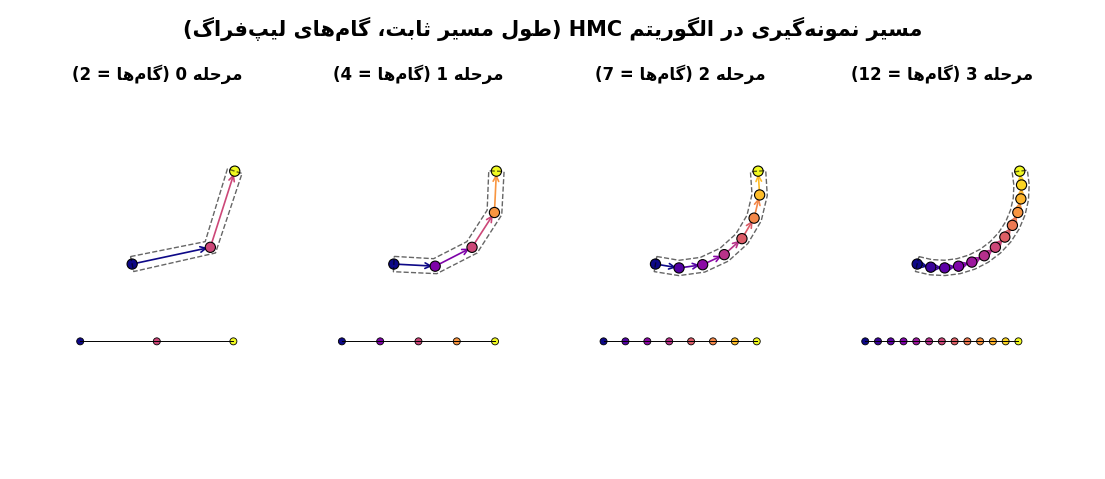

Saved to /content/hmc_trajectory.(png,pdf)


In [9]:
# -*- coding: utf-8 -*-
# HMC Trajectory (Fixed-Length Leapfrog) – Colab ready with Persian labels

# نصب ابزارهای فارسی‌نویسی و فونت
!pip -q install arabic-reshaper python-bidi
!wget -q https://github.com/rastikerdar/vazirmatn/releases/download/v33.003/Vazirmatn-FD-UI-Regular.ttf -O /usr/local/share/fonts/Vazirmatn.ttf
!fc-cache -f -v >/dev/null

import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.patches import Circle, FancyArrowPatch
import arabic_reshaper
from bidi.algorithm import get_display

mpl.rcParams["font.family"] = "Vazirmatn"
mpl.rcParams["font.size"]   = 12

def fa(t):  # متن فارسی درست (RTL)
    return get_display(arabic_reshaper.reshape(t))

def arrow(ax, a, b, **kw):
    ax.add_patch(FancyArrowPatch(a, b, arrowstyle="->", mutation_scale=10, lw=1.2, **kw))

def draw_hmc_stage(ax, center, R, theta_total, n_leap, cmap):
    """
    رسم مسیر HMC با طول مسیر ثابت (theta_total) و n_leap گام لیپ‌فراگ
    """
    t = np.linspace(-np.pi*0.6, -np.pi*0.6 + theta_total, n_leap+1)
    x = center[0] + R*np.cos(t)
    y = center[1] + R*np.sin(t)

    # فلش‌ها بین نقاط (جهت حرکت)
    for i in range(len(x)-1):
        c = cmap(i/(len(x)-1))
        arrow(ax, (x[i], y[i]), (x[i+1], y[i+1]), color=c)

    # گره‌ها (حالت‌ها) با رنگ تدریجی
    for i in range(len(x)):
        c = cmap(i/(len(x)-1))
        ax.add_patch(Circle((x[i], y[i]), 0.08, facecolor=c, edgecolor="k", lw=0.8))

    # مرز خط‌چین محدوده حرکت در این مرحله
    dx, dy = np.gradient(x), np.gradient(y)
    nrm = np.maximum(np.hypot(dx, dy), 1e-6)
    nx, ny = -dy/nrm, dx/nrm
    off = 0.12
    xo, yo = x + off*nx, y + off*ny
    xm, ym = x - off*nx, y - off*ny
    ax.plot(np.r_[xo, xm[::-1], xo[0]], np.r_[yo, ym[::-1], yo[0]], ls="--", lw=1, alpha=0.6, color="k")

def draw_linear_chain(ax, x0, y0, n, width=2.4, color_map=None):
    """
    زنجیره خطی از n حالت (نمایش لیپ‌فراگ‌ها در HMC)
    """
    if n <= 1:
        xs = np.array([x0])
    else:
        xs = np.linspace(x0 - width/2, x0 + width/2, n)
    ys = np.full_like(xs, y0)

    # یال‌ها
    for i in range(len(xs)-1):
        ax.plot([xs[i], xs[i+1]], [ys[i], ys[i+1]], color="k", lw=0.7)

    # گره‌ها
    for i, (xx, yy) in enumerate(zip(xs, ys)):
        col = (color_map(i/(len(xs)-1)) if (color_map and len(xs)>1) else "0.7")
        ax.add_patch(Circle((xx, yy), 0.055, facecolor=col, edgecolor="k", lw=0.6))

# ---- ترسیم چهار مرحله HMC با طول مسیر ثابت و تعداد گام‌های متفاوت ----
fig, ax = plt.subplots(figsize=(14, 6))
ax.set_aspect("equal"); ax.axis("off")
ax.set_xlim(-8.5, 8.5); ax.set_ylim(-2.0, 5.2)

cmap = plt.cm.plasma

centers = [(-6.2, 2.4), (-2.1, 2.4), (2.0, 2.4), (6.1, 2.4)]
theta_total = 2.1                 # طول مسیر ثابت (مثلاً مجموع ε*L)
leap_steps  = [2, 4, 7, 12]       # تعداد گام‌های لیپ‌فراگ در هر مرحله

for i, (c, n) in enumerate(zip(centers, leap_steps)):
    draw_hmc_stage(ax, c, R=1.25, theta_total=theta_total, n_leap=n, cmap=cmap)
    ax.text(c[0], 4.1, fa(f"مرحله {i} (گام‌ها = {n})"), ha="center", fontsize=12, fontweight="bold")

# زنجیره‌های خطی پایین (نمایش توالی حالت‌ها در هر مرحله)
chains_x = centers
for (x, n) in zip(chains_x, leap_steps):
    draw_linear_chain(ax, x0=x[0], y0=0.0, n=n+1, width=2.4, color_map=cmap)

# عنوان کلی
ax.text(0, 4.8, fa("مسیر نمونه‌گیری در الگوریتم HMC (طول مسیر ثابت، گام‌های لیپ‌فراگ)"),
        ha="center", fontsize=15, fontweight="bold")

plt.savefig("/content/hmc_trajectory.png", dpi=300, bbox_inches="tight")
plt.savefig("/content/hmc_trajectory.pdf",  bbox_inches="tight")
plt.show()
print("Saved to /content/hmc_trajectory.(png,pdf)")


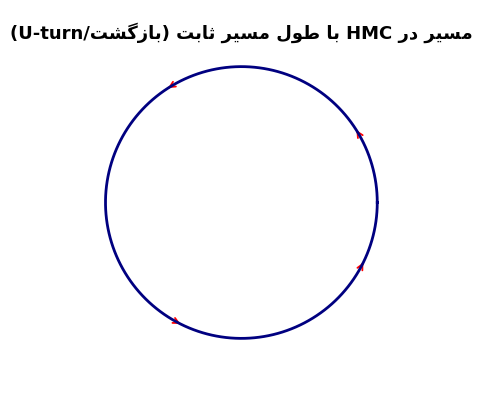

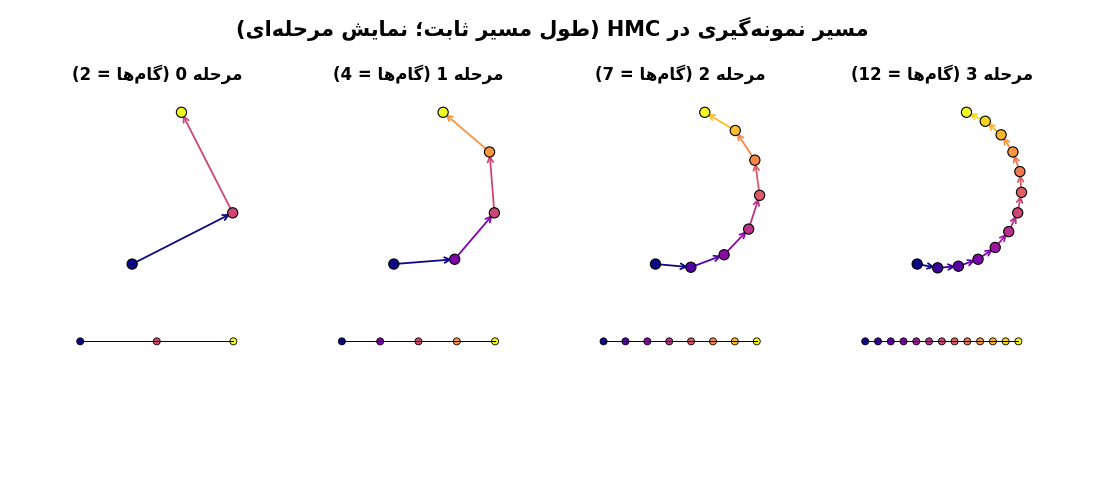

✅ Saved: /content/hmc_full_circle.png , /content/hmc_trajectory_stages.(png,pdf)


In [10]:
# -*- coding: utf-8 -*-
# HMC – نسخه کاملِ U-turn (دایره کامل) + نسخه مرحله‌ای کوتاه
# Colab-ready with Persian labels

# نصب و فونت فارسی
!pip -q install arabic-reshaper python-bidi
!wget -q https://github.com/rastikerdar/vazirmatn/releases/download/v33.003/Vazirmatn-FD-UI-Regular.ttf -O /usr/local/share/fonts/Vazirmatn.ttf
!fc-cache -f -v >/dev/null

import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.patches import Circle, FancyArrowPatch
import arabic_reshaper
from bidi.algorithm import get_display

mpl.rcParams["font.family"] = "Vazirmatn"
mpl.rcParams["font.size"]   = 12

def fa(t):  # متن فارسی راست‌به‌چپ
    return get_display(arabic_reshaper.reshape(t))

def arrow(ax, a, b, **kw):
    ax.add_patch(FancyArrowPatch(a, b, arrowstyle="->", mutation_scale=10, lw=1.3, **kw))

# -------------------- حالت 1: HMC با دایره کامل (U-turn واضح) --------------------
fig, ax = plt.subplots(figsize=(6, 5))
ax.set_aspect("equal"); ax.axis("off")
ax.set_xlim(-1.7, 1.7); ax.set_ylim(-1.7, 1.7)

R = 1.2
t = np.linspace(0, 2*np.pi, 180)     # 2π → دایره کامل
x, y = R*np.cos(t), R*np.sin(t)

ax.plot(x, y, lw=2, color="navy")
# چند فلش جهت حرکت
for k in [15, 60, 120, 165]:
    arrow(ax, (x[k], y[k]), (x[k+1], y[k+1]), color="red")

ax.text(0, 1.45, fa("مسیر در HMC با طول مسیر ثابت (بازگشت/U-turn)"),
        ha="center", fontsize=13, fontweight="bold")

plt.savefig("/content/hmc_full_circle.png", dpi=300, bbox_inches="tight")
plt.show()

# -------------------- حالت 2: HMC مرحله‌ای (طول مسیر کوتاه ثابت) --------------------
def draw_hmc_stage(ax, center, R, theta_total, n_leap, cmap):
    t = np.linspace(-np.pi*0.6, -np.pi*0.6 + theta_total, n_leap+1)
    x = center[0] + R*np.cos(t)
    y = center[1] + R*np.sin(t)
    for i in range(len(x)-1):
        arrow(ax, (x[i], y[i]), (x[i+1], y[i+1]), color=cmap(i/(len(x)-1)))
    for i in range(len(x)):
        ax.add_patch(Circle((x[i], y[i]), 0.08, facecolor=cmap(i/(len(x)-1)), edgecolor="k", lw=0.8))

def draw_linear_chain(ax, x0, y0, n, width=2.4, color_map=None):
    xs = np.linspace(x0 - width/2, x0 + width/2, n) if n > 1 else np.array([x0])
    ys = np.full_like(xs, y0)
    for i in range(len(xs)-1):
        ax.plot([xs[i], xs[i+1]], [ys[i], ys[i+1]], color="k", lw=0.7)
    for i, (xx, yy) in enumerate(zip(xs, ys)):
        ax.add_patch(Circle((xx, yy), 0.055,
                            facecolor=(color_map(i/(len(xs)-1)) if len(xs)>1 else "0.7"),
                            edgecolor="k", lw=0.6))

fig, ax = plt.subplots(figsize=(14, 6))
ax.set_aspect("equal"); ax.axis("off")
ax.set_xlim(-8.5, 8.5); ax.set_ylim(-2.0, 5.2)

cmap = plt.cm.plasma
centers = [(-6.2, 2.4), (-2.1, 2.4), (2.0, 2.4), (6.1, 2.4)]
theta_total = np.pi        # مسیر کوتاه (نیم‌دایره) برای نمایش مراحل
leap_steps  = [2, 4, 7, 12]

for i, (c, n) in enumerate(zip(centers, leap_steps)):
    draw_hmc_stage(ax, c, R=1.25, theta_total=theta_total, n_leap=n, cmap=cmap)
    ax.text(c[0], 4.1, fa(f"مرحله {i} (گام‌ها = {n})"), ha="center", fontsize=12, fontweight="bold")

for (x, n) in zip(centers, leap_steps):
    draw_linear_chain(ax, x0=x[0], y0=0.0, n=n+1, width=2.4, color_map=cmap)

ax.text(0, 4.8, fa("مسیر نمونه‌گیری در HMC (طول مسیر ثابت؛ نمایش مرحله‌ای)"),
        ha="center", fontsize=15, fontweight="bold")

plt.savefig("/content/hmc_trajectory_stages.png", dpi=300, bbox_inches="tight")
plt.savefig("/content/hmc_trajectory_stages.pdf",  bbox_inches="tight")
plt.show()

print("✅ Saved:",
      "/content/hmc_full_circle.png ,",
      "/content/hmc_trajectory_stages.(png,pdf)")


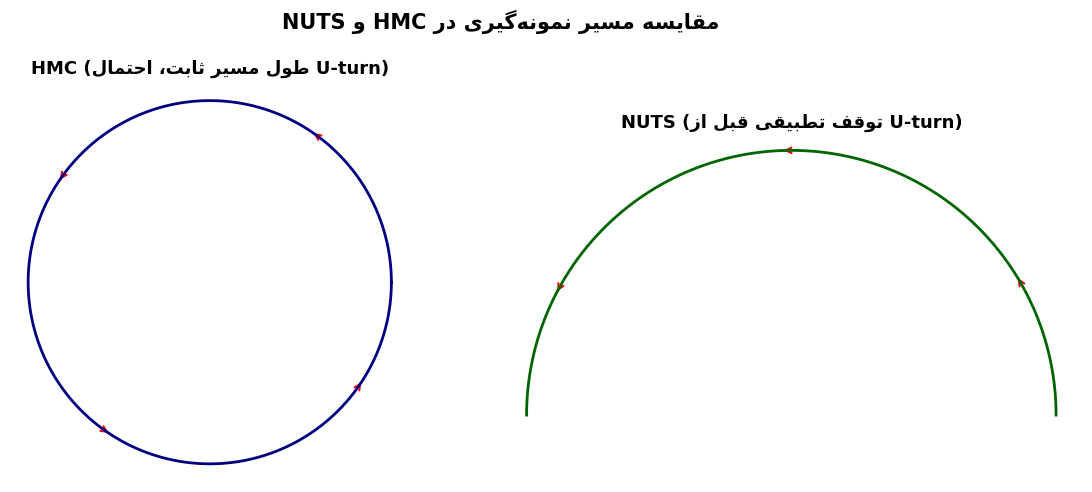

✅ Saved: /content/hmc_vs_nuts.(png,pdf)


In [13]:
# -*- coding: utf-8 -*-
# مقایسه HMC vs NUTS – Colab ready with Persian labels

!pip -q install arabic-reshaper python-bidi
!wget -q https://github.com/rastikerdar/vazirmatn/releases/download/v33.003/Vazirmatn-FD-UI-Regular.ttf -O /usr/local/share/fonts/Vazirmatn.ttf
!fc-cache -f -v >/dev/null

import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.patches import Circle, FancyArrowPatch
import arabic_reshaper
from bidi.algorithm import get_display

mpl.rcParams["font.family"] = "Vazirmatn"
mpl.rcParams["font.size"]   = 12

def fa(t):
    return get_display(arabic_reshaper.reshape(t))

def arrow(ax, a, b, **kw):
    ax.add_patch(FancyArrowPatch(a, b, arrowstyle="->", mutation_scale=10, lw=1.5, **kw))

# ---------------------- HMC (دایره کامل با U-turn) ----------------------
def draw_hmc(ax):
    R = 1.2
    t = np.linspace(0, 2*np.pi, 200)   # مسیر کامل
    x, y = R*np.cos(t), R*np.sin(t)
    ax.plot(x, y, lw=2, color="navy")
    for k in [30, 80, 130, 180]:
        arrow(ax, (x[k], y[k]), (x[k+1], y[k+1]), color="red")
    ax.set_title(fa("HMC (طول مسیر ثابت، احتمال U-turn)"), fontsize=13, fontweight="bold")
    ax.set_aspect("equal"); ax.axis("off")

# ---------------------- NUTS (نیم‌دایره، توقف قبل از U-turn) ----------------------
def draw_nuts(ax):
    R = 1.2
    t = np.linspace(0, np.pi, 120)   # نیم‌دایره (توقف قبل از بازگشت)
    x, y = R*np.cos(t), R*np.sin(t)
    ax.plot(x, y, lw=2, color="darkgreen")
    for k in [20, 60, 100]:
        arrow(ax, (x[k], y[k]), (x[k+1], y[k+1]), color="red")
    ax.set_title(fa("NUTS (توقف تطبیقی قبل از U-turn)"), fontsize=13, fontweight="bold")
    ax.set_aspect("equal"); ax.axis("off")

# ---------------------- شکل نهایی ----------------------
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
draw_hmc(axes[0])
draw_nuts(axes[1])
plt.suptitle(fa("مقایسه مسیر نمونه‌گیری در HMC و NUTS"), fontsize=15, fontweight="bold")
plt.tight_layout()
plt.savefig("/content/hmc_vs_nuts.png", dpi=300, bbox_inches="tight")
plt.savefig("/content/hmc_vs_nuts.pdf",  bbox_inches="tight")
plt.show()

print("✅ Saved: /content/hmc_vs_nuts.(png,pdf)")


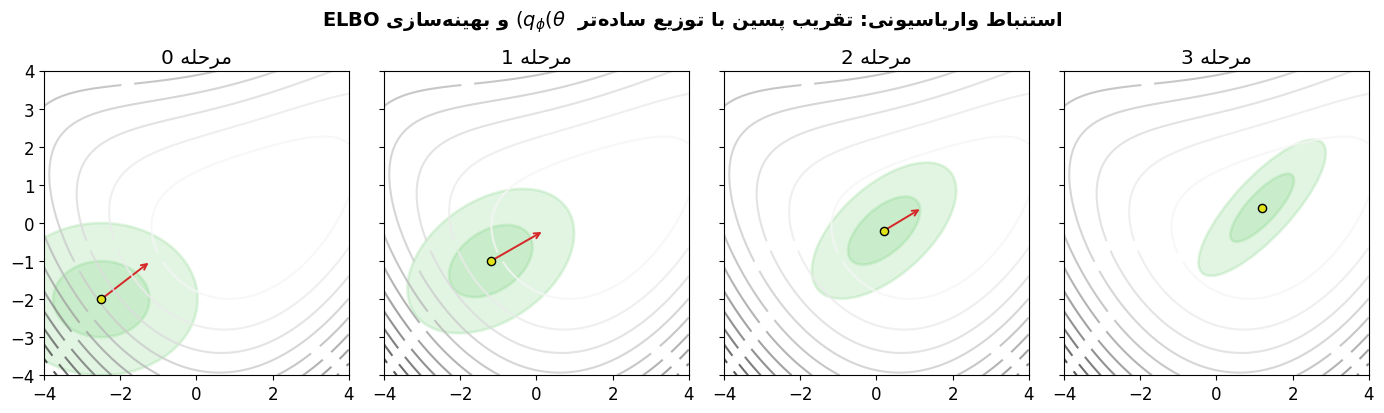

✅ Saved: /content/vi_elbo_steps.(png,pdf)


In [14]:
# -*- coding: utf-8 -*-
# Variational Inference (VI) schematic – Colab ready with Persian labels

# نصب و فونت فارسی
!pip -q install arabic-reshaper python-bidi
!wget -q https://github.com/rastikerdar/vazirmatn/releases/download/v33.003/Vazirmatn-FD-UI-Regular.ttf -O /usr/local/share/fonts/Vazirmatn.ttf
!fc-cache -f -v >/dev/null

import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.patches import Ellipse, FancyArrowPatch
import arabic_reshaper
from bidi.algorithm import get_display

mpl.rcParams["font.family"] = "Vazirmatn"
mpl.rcParams["font.size"]   = 12

def fa(t):
    return get_display(arabic_reshaper.reshape(t))

def banana_density_grid(xmin=-4, xmax=4, ymin=-4, ymax=4, n=300, a=1.5, b=0.1):
    """یک «پسین» خمیده مصنوعی برای نمایش: خطوط هم‌تراز شبیه بنانا"""
    xs = np.linspace(xmin, xmax, n)
    ys = np.linspace(ymin, ymax, n)
    X, Y = np.meshgrid(xs, ys)
    # تابع انرژی خمیده
    Z = (X - a)**2/1.2 + (Y - b*(X**2 - a**2))**2/0.6
    return X, Y, Z

def draw_gaussian(ax, mean, cov, color, lw=2, alpha=0.15, label=None):
    """رسم بیضی‌های q_phi (خط 1σ و 2σ)"""
    vals, vecs = np.linalg.eigh(cov)
    order = vals.argsort()[::-1]
    vals, vecs = vals[order], vecs[:, order]
    theta = np.degrees(np.arctan2(*vecs[:,0][::-1]))
    for k in [1,2]:
        w, h = 2*k*np.sqrt(vals)
        e = Ellipse(xy=mean, width=w, height=h, angle=theta,
                    edgecolor=color, facecolor=color, lw=lw, alpha=alpha)
        ax.add_patch(e)
    if label:
        ax.text(mean[0], mean[1], label, fontsize=11, ha="center", va="center")

def arrow(ax, a, b, **kw):
    ax.add_patch(FancyArrowPatch(a, b, arrowstyle="->", mutation_scale=10, lw=1.4, **kw))

# داده‌ی «پسین واقعی»
X, Y, Z = banana_density_grid()

# چهار مرحله از VI (میانگین و کوواریانس در حال بهبود)
means = [np.array([-2.5, -2.0]), np.array([-1.2, -1.0]), np.array([0.2, -0.2]), np.array([1.2, 0.4])]
covs  = [np.array([[1.6, 0.0],[0.0, 1.0]]),
         np.array([[1.2, 0.4],[0.4, 0.9]]),
         np.array([[0.9, 0.5],[0.5, 0.8]]),
         np.array([[0.7, 0.6],[0.6, 0.8]])]

cmap = plt.cm.viridis
fig, axes = plt.subplots(1, 4, figsize=(14, 4), sharex=True, sharey=True)

for i, ax in enumerate(axes):
    # پس‌زمینه: خطوط هم‌ترازِ پسین واقعی p(θ|D)
    cs = ax.contour(X, Y, Z, levels=12, cmap="Greys", alpha=0.8)
    ax.clabel(cs, inline=1, fontsize=7, fmt="")
    # q_phi در مرحله i
    draw_gaussian(ax, means[i], covs[i], color=cmap(0.75), alpha=0.18)
    ax.scatter(*means[i], s=35, color=cmap(0.95), edgecolor="k", zorder=3)
    if i>0:
        arrow(axes[i-1], (means[i-1][0], means[i-1][1]), (means[i][0], means[i][1]), color="tab:red")
    ax.set_title(fa(f"مرحله {i}"))
    ax.set_xlim(-4,4); ax.set_ylim(-4,4)
    ax.set_aspect("equal"); ax.grid(False)

fig.suptitle(fa("استنباط واریاسیونی: تقریب پسین با توزیع ساده‌تر  $q_\\phi(\\theta)$ و بهینه‌سازی ELBO"),
             fontsize=14, fontweight="bold")
plt.tight_layout()
plt.savefig("/content/vi_elbo_steps.png", dpi=300, bbox_inches="tight")
plt.savefig("/content/vi_elbo_steps.pdf",  bbox_inches="tight")
plt.show()

print("✅ Saved: /content/vi_elbo_steps.(png,pdf)")


/tmp/ipython-input-710888590.py:103: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


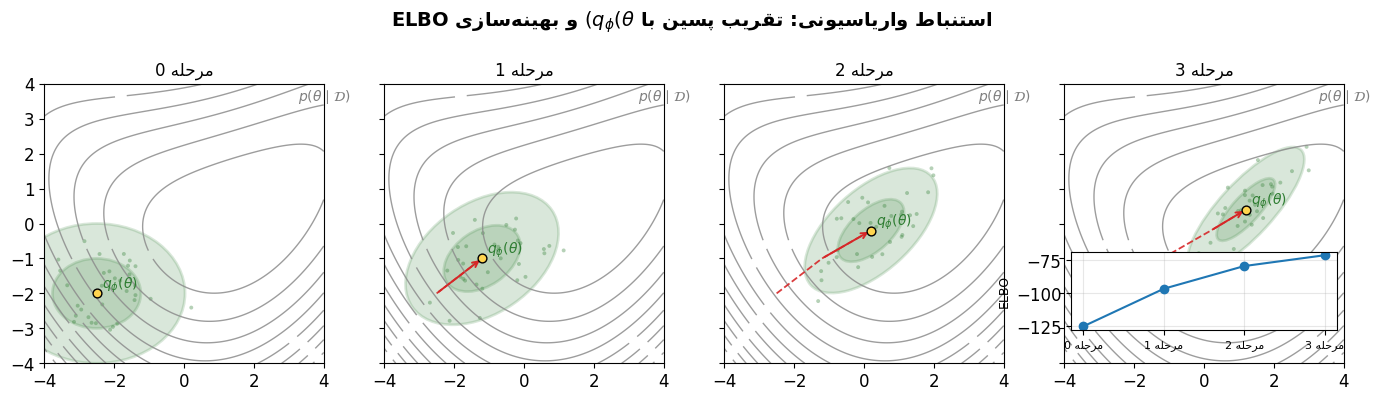

✅ Saved: /content/vi_elbo_steps_plus.(png,pdf)


In [15]:
# -*- coding: utf-8 -*-
# VI schematic (enhanced): target posterior contours + q_phi ellipses + mean trail + samples + ELBO inset
# Colab-ready with Persian labels

# 1) Persian text support
!pip -q install arabic-reshaper python-bidi
!wget -q https://github.com/rastikerdar/vazirmatn/releases/download/v33.003/Vazirmatn-FD-UI-Regular.ttf -O /usr/local/share/fonts/Vazirmatn.ttf
!fc-cache -f -v >/dev/null

import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.patches import Ellipse, FancyArrowPatch
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import arabic_reshaper
from bidi.algorithm import get_display

mpl.rcParams["font.family"] = "Vazirmatn"
mpl.rcParams["font.size"]   = 12

def fa(t):  # fix RTL for Persian labels
    return get_display(arabic_reshaper.reshape(t))

def banana_density_grid(xmin=-4, xmax=4, ymin=-4, ymax=4, n=300, a=1.5, b=0.1):
    """Synthetic banana-shaped energy for posterior-like contours."""
    xs = np.linspace(xmin, xmax, n)
    ys = np.linspace(ymin, ymax, n)
    X, Y = np.meshgrid(xs, ys)
    Z = (X - a)**2/1.2 + (Y - b*(X**2 - a**2))**2/0.6
    return X, Y, Z

def draw_gaussian(ax, mean, cov, color="#2e7d32", lw=2, alpha=0.18, label=None):
    """Plot 1σ & 2σ ellipses of a 2D Gaussian."""
    vals, vecs = np.linalg.eigh(cov)
    order = vals.argsort()[::-1]
    vals, vecs = vals[order], vecs[:, order]
    theta = np.degrees(np.arctan2(*vecs[:,0][::-1]))
    for k in [1,2]:
        w, h = 2*k*np.sqrt(vals)
        e = Ellipse(mean, width=w, height=h, angle=theta,
                    edgecolor=color, facecolor=color, lw=lw, alpha=alpha)
        ax.add_patch(e)
    if label:
        ax.text(mean[0]+0.15, mean[1]+0.15, label, fontsize=10, color=color)

def arrow(ax, a, b, **kw):
    ax.add_patch(FancyArrowPatch(a, b, arrowstyle="->", mutation_scale=10, lw=1.4, **kw))

# --- target "posterior" grid
X, Y, Z = banana_density_grid()

# Four VI steps: means & covariances (toy schedule moving toward the curved mode)
means = [np.array([-2.5, -2.0]), np.array([-1.2, -1.0]), np.array([0.2, -0.2]), np.array([1.2, 0.4])]
covs  = [np.array([[1.6, 0.0],[0.0, 1.0]]),
         np.array([[1.2, 0.4],[0.4, 0.9]]),
         np.array([[0.9, 0.5],[0.5, 0.8]]),
         np.array([[0.7, 0.6],[0.6, 0.8]])]

# Mock ELBO values (increasing)
elbo = [-125.0, -96.5, -79.3, -71.1]

rng = np.random.default_rng(42)
c_q  = "#2e7d32"   # green for q_phi
c_mu = "tab:red"   # red arrows for mean updates

fig, axes = plt.subplots(1, 4, figsize=(14, 4), sharex=True, sharey=True)

for i, ax in enumerate(axes):
    # Target posterior contours
    cs = ax.contour(X, Y, Z, levels=12, colors="0.55", linewidths=1.0, alpha=0.85)
    ax.clabel(cs, inline=1, fontsize=7, fmt="")
    ax.text(3.25, 3.5, r"$p(\theta\mid\mathcal{D})$", fontsize=10, color="gray")

    # q_phi ellipses + samples
    draw_gaussian(ax, means[i], covs[i], color=c_q, alpha=0.18, label=r"$q_{\phi}(\theta)$")
    samples = rng.multivariate_normal(means[i], covs[i], size=35)
    ax.scatter(samples[:,0], samples[:,1], s=8, alpha=0.35, color=c_q, edgecolor="none")

    # mean marker
    ax.scatter(*means[i], s=40, color="#FFD54F", edgecolor="k", zorder=3)

    # mean trail up to current step
    if i > 0:
        xs = [m[0] for m in means[:i+1]]
        ys = [m[1] for m in means[:i+1]]
        ax.plot(xs, ys, ls="--", lw=1.3, color=c_mu, alpha=0.9)
        arrow(ax, (means[i-1][0], means[i-1][1]), (means[i][0], means[i][1]), color=c_mu)

    ax.set_title(fa(f"مرحله {i}"), fontsize=12)
    ax.set_xlim(-4,4); ax.set_ylim(-4,4)
    ax.set_aspect("equal"); ax.grid(False)

# Inset ELBO plot on the last panel
ax_elbo = inset_axes(axes[-1], width="95%", height="28%", loc="lower center", borderpad=2.0)
ax_elbo.plot(range(len(elbo)), elbo, marker="o")
ax_elbo.set_xticks(range(4))
ax_elbo.set_xticklabels([fa(f"مرحله {k}") for k in range(4)], fontsize=8)
ax_elbo.set_ylabel("ELBO", fontsize=9)
ax_elbo.grid(True, alpha=0.3)

fig.suptitle(fa("استنباط واریاسیونی: تقریب پسین با $q_{\\phi}(\\theta)$ و بهینه‌سازی ELBO"),
             fontsize=14, fontweight="bold")
plt.tight_layout()
plt.savefig("/content/vi_elbo_steps_plus.png", dpi=300, bbox_inches="tight")
plt.savefig("/content/vi_elbo_steps_plus.pdf",  bbox_inches="tight")
plt.show()

print("✅ Saved: /content/vi_elbo_steps_plus.(png,pdf)")


In [2]:
!pip -q install pyro-ppl

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 756.0/756.0 kB 11.4 MB/s eta 0:00:00


Sample: 100%|██████████| 3500/3500 [00:48, 72.12it/s, step size=5.41e-01, acc. prob=0.950]



NUTS diagnostics:

                mean       std    median      5.0%     95.0%     n_eff     r_hat
    theta0      0.00      0.01      0.00     -0.01      0.02   2711.11      1.00
    theta1      0.99      0.01      0.99      0.97      1.01   2613.08      1.00
    theta2      0.99      0.01      1.00      0.98      1.01   2824.38      1.00

Number of divergences: 0
None

=== Metrics (rounded) ===
  Method  MSE vs sin(x)  Coverage_obs (95%)  Coverage_true (95%)  \
0    MAP         0.0001                0.95                  1.0   
1    HMC         0.0001                0.95                  1.0   
2   NUTS         0.0001                0.95                  1.0   
3     VI         0.0000                0.96                  1.0   

   Avg. width (95%)  Runtime [s]  
0            0.3920       0.0062  
1            0.3963      44.0643  
2            0.3975      48.5405  
3            0.3964      15.1994  


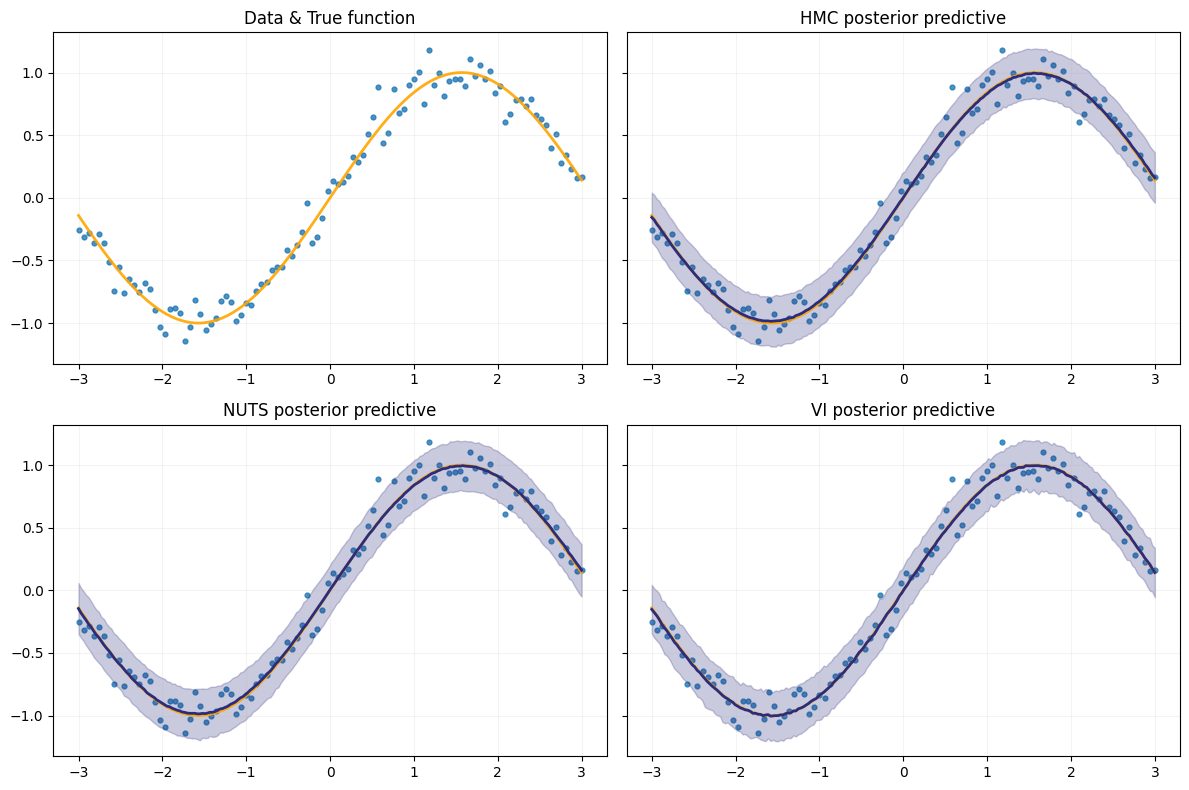

In [15]:
# -*- coding: utf-8 -*-
# MAP (L-BFGS) + HMC + NUTS (robust) + VI
# Metrics: MSE, 95% coverage (obs & true), avg width, runtime
# Plots: 2x2 (MAP, HMC, NUTS, VI)


import time
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import torch
import pyro
import pyro.distributions as dist
from pyro.infer import MCMC, NUTS, SVI, Trace_ELBO
from pyro.infer.mcmc import HMC          # HMC کلاسیک
from pyro.optim import Adam
from scipy.optimize import minimize

# reproducibility
np.random.seed(0)
torch.manual_seed(0)
pyro.set_rng_seed(0)

# -----------------------------
# 1) Data
# -----------------------------
n = 100
X = torch.linspace(-3, 3, n).unsqueeze(1)
true_sigma = 0.1
y_true = torch.sin(X).squeeze()
y = y_true + true_sigma * torch.randn_like(y_true)

x_np = X.numpy().flatten()
y_np = y.numpy().flatten()

# smooth grid for plotting/MSE
X_test = torch.linspace(-3, 3, 200).unsqueeze(1)
y_true_test = torch.sin(X_test).squeeze()

def f_np(theta, x):
    return theta[0] + theta[1]*np.sin(theta[2]*x)

def coverage(y_lower, y_upper, y_ref):
    return np.mean((y_ref >= y_lower) & (y_ref <= y_upper))

def posterior_predictive_on(grid_X, thetas, add_obs_noise=True):
    """thetas: Tensor [n_draws, 3]"""
    ys = []
    for th in thetas:
        mu = th[0] + th[1]*torch.sin(th[2]*grid_X.squeeze())
        ys.append((mu + true_sigma*torch.randn_like(mu)).numpy() if add_obs_noise else mu.numpy())
    return np.stack(ys, axis=0)

# -----------------------------
# 2) MAP (L-BFGS-B)
# -----------------------------
def neg_log_post(theta, x, y, sigma):
    lp = -0.5*np.sum(theta**2)             # prior N(0,1)
    y_pred = f_np(theta, x)
    ll = -0.5*np.sum(((y - y_pred)/sigma)**2)
    return -(lp + ll)

theta0 = np.array([0.0, 1.0, 1.0])
t0 = time.time()
res = minimize(neg_log_post, theta0, args=(x_np, y_np, true_sigma), method='L-BFGS-B')
t_map = time.time() - t0
theta_map = res.x

# predictive on grid (for plot/MSE)
y_mean_map = f_np(theta_map, X_test.numpy().flatten())
y_lower_map = y_mean_map - 1.96*true_sigma
y_upper_map = y_mean_map + 1.96*true_sigma
mse_map = np.mean((y_mean_map - y_true_test.numpy())**2)

# predictive on training X (for coverage)
y_mean_map_X = f_np(theta_map, x_np)
y_lower_map_X = y_mean_map_X - 1.96*true_sigma
y_upper_map_X = y_mean_map_X + 1.96*true_sigma
cov_obs_map  = coverage(y_lower_map_X, y_upper_map_X, y.numpy())
cov_true_map = coverage(y_lower_map_X, y_upper_map_X, y_true.numpy())
width_map    = np.mean(y_upper_map_X - y_lower_map_X)

# -----------------------------
# 3) Unified Bayesian model (for HMC/NUTS/VI)
# -----------------------------
def bnn_model(x, y=None):
    theta0 = pyro.sample("theta0", dist.Normal(0., 1.))
    theta1 = pyro.sample("theta1", dist.Normal(0., 1.))
    theta2 = pyro.sample("theta2", dist.Normal(0., 1.))
    mean = theta0 + theta1 * torch.sin(theta2 * x.squeeze())
    with pyro.plate("data", x.shape[0]):
        pyro.sample("obs", dist.Normal(mean, true_sigma), obs=None if y is None else y.squeeze())

# -----------------------------
# 4) HMC (fixed step/length)
# -----------------------------
hmc_kernel = HMC(bnn_model, step_size=0.02, num_steps=25)
t0 = time.time()
mcmc_hmc = MCMC(hmc_kernel, num_samples=3000, warmup_steps=500, num_chains=1)
mcmc_hmc.run(X, y)
t_hmc = time.time() - t0
samps_hmc = mcmc_hmc.get_samples()
idx = np.random.choice(len(samps_hmc["theta0"]), size=3000, replace=False)
thetas_hmc = torch.stack([samps_hmc["theta0"][idx],
                          samps_hmc["theta1"][idx],
                          samps_hmc["theta2"][idx]], dim=1)

y_draws_hmc_grid = posterior_predictive_on(X_test, thetas_hmc, add_obs_noise=True)
y_mean_hmc = y_draws_hmc_grid.mean(axis=0)
y_lo_hmc   = np.quantile(y_draws_hmc_grid, 0.025, axis=0)
y_hi_hmc   = np.quantile(y_draws_hmc_grid, 0.975, axis=0)
mse_hmc    = np.mean((y_mean_hmc - y_true_test.numpy())**2)

y_draws_hmc_X = posterior_predictive_on(X, thetas_hmc, add_obs_noise=True)
loX_hmc, hiX_hmc = np.quantile(y_draws_hmc_X, [0.025, 0.975], axis=0)
cov_obs_hmc  = coverage(loX_hmc, hiX_hmc, y.numpy())
cov_true_hmc = coverage(loX_hmc, hiX_hmc, y_true.numpy())
width_hmc    = np.mean(hiX_hmc - loX_hmc)


# -----------------------------
# 5) NUTS (robust configuration) — Pyro API compatible
# -----------------------------
from pyro.infer import MCMC, NUTS
from pyro.infer.autoguide.initialization import init_to_value

# شروع از MAP با init strategy
init_strategy = init_to_value(values={
    "theta0": torch.tensor(float(theta_map[0])),
    "theta1": torch.tensor(float(theta_map[1])),
    "theta2": torch.tensor(float(theta_map[2])),
})

nuts_kernel = NUTS(
    bnn_model,
    init_strategy=init_strategy,  # ← شروع از MAP
    adapt_mass_matrix=True,       # ← معادل dense mass adaptation
    target_accept_prob=0.9,       # پذیرش محافظه‌کارانه‌تر
    max_tree_depth=12,            # عمق درخت بیشتر
)

t0 = time.time()
mcmc = MCMC(
    nuts_kernel,
    num_samples=3000,
    warmup_steps=500,
    num_chains=1,
)
mcmc.run(X, y)
t_nuts = time.time() - t0

print("\nNUTS diagnostics:")
print(mcmc.summary(prob=0.9))

samps = mcmc.get_samples()
idx = np.random.choice(len(samps["theta0"]), size=min(3000, len(samps["theta0"])), replace=False)
thetas_nuts = torch.stack([samps["theta0"][idx],
                           samps["theta1"][idx],
                           samps["theta2"][idx]], dim=1)

# محاسبات پیش‌بینی مثل قبل
y_draws_nuts_grid = posterior_predictive_on(X_test, thetas_nuts, add_obs_noise=True)
y_mean_nuts = y_draws_nuts_grid.mean(axis=0)
y_lo_nuts   = np.quantile(y_draws_nuts_grid, 0.025, axis=0)
y_hi_nuts   = np.quantile(y_draws_nuts_grid, 0.975, axis=0)
mse_nuts    = np.mean((y_mean_nuts - y_true_test.numpy())**2)

y_draws_nuts_X = posterior_predictive_on(X, thetas_nuts, add_obs_noise=True)
loX_nuts, hiX_nuts = np.quantile(y_draws_nuts_X, [0.025, 0.975], axis=0)
cov_obs_nuts  = coverage(loX_nuts, hiX_nuts, y.numpy())
cov_true_nuts = coverage(loX_nuts, hiX_nuts, y_true.numpy())
width_nuts    = np.mean(hiX_nuts - loX_nuts)

# -----------------------------
# 6) VI (mean-field Normal)
# -----------------------------
pyro.clear_param_store()
def guide_vi(x, y=None):
    t0_loc  = pyro.param("t0_loc",  torch.tensor(0.0))
    t0_std  = pyro.param("t0_std",  torch.tensor(0.1), constraint=dist.constraints.positive)
    t1_loc  = pyro.param("t1_loc",  torch.tensor(1.0))
    t1_std  = pyro.param("t1_std",  torch.tensor(0.1), constraint=dist.constraints.positive)
    t2_loc  = pyro.param("t2_loc",  torch.tensor(1.0))
    t2_std  = pyro.param("t2_std",  torch.tensor(0.1), constraint=dist.constraints.positive)
    pyro.sample("theta0", dist.Normal(t0_loc, t0_std))
    pyro.sample("theta1", dist.Normal(t1_loc, t1_std))
    pyro.sample("theta2", dist.Normal(t2_loc, t2_std))

opt = Adam({"lr": 1e-2})
svi = SVI(bnn_model, guide_vi, opt, loss=Trace_ELBO())

t0 = time.time()
for _ in range(3000):
    svi.step(X, y)
t_vi = time.time() - t0

with torch.no_grad():
    n_draws = 1000
    th0 = dist.Normal(pyro.param("t0_loc"), pyro.param("t0_std")).sample([n_draws])
    th1 = dist.Normal(pyro.param("t1_loc"), pyro.param("t1_std")).sample([n_draws])
    th2 = dist.Normal(pyro.param("t2_loc"), pyro.param("t2_std")).sample([n_draws])
    thetas_vi = torch.stack([th0, th1, th2], dim=1)

y_draws_vi_grid = posterior_predictive_on(X_test, thetas_vi, add_obs_noise=True)
y_mean_vi = y_draws_vi_grid.mean(axis=0)
y_lo_vi   = np.quantile(y_draws_vi_grid, 0.025, axis=0)
y_hi_vi   = np.quantile(y_draws_vi_grid, 0.975, axis=0)
mse_vi    = np.mean((y_mean_vi - y_true_test.numpy())**2)

y_draws_vi_X = posterior_predictive_on(X, thetas_vi, add_obs_noise=True)
loX_vi, hiX_vi = np.quantile(y_draws_vi_X, [0.025, 0.975], axis=0)
cov_obs_vi  = coverage(loX_vi, hiX_vi, y.numpy())
cov_true_vi = coverage(loX_vi, hiX_vi, y_true.numpy())
width_vi    = np.mean(hiX_vi - loX_vi)

# -----------------------------
# 7) Results table
# -----------------------------
df = pd.DataFrame({
    "Method": ["MAP", "HMC", "NUTS", "VI"],
    "MSE vs sin(x)": [mse_map, mse_hmc, mse_nuts, mse_vi],
    "Coverage_obs (95%)": [cov_obs_map, cov_obs_hmc, cov_obs_nuts, cov_obs_vi],
    "Coverage_true (95%)": [cov_true_map, cov_true_hmc, cov_true_nuts, cov_true_vi],
    "Avg. width (95%)": [width_map, width_hmc, width_nuts, width_vi],
    "Runtime [s]": [t_map, t_hmc, t_nuts, t_vi],
})
print("\n=== Metrics (rounded) ===")
print(df.round(4))
# -----------------------------
# 8) Plots (2x2)
# -----------------------------
fig, axes = plt.subplots(2,2, figsize=(12,8), sharey=True)

def draw_panel(ax, x, y, xg, y_true_g, y_mean=None, y_lo=None, y_hi=None, title=""):
    ax.scatter(x, y, s=12, color="#1f77b4", alpha=0.8, label="Observations")
    ax.plot(xg, y_true_g, color="orange", lw=2, alpha=0.9, label="True function")
    if y_mean is not None:
        ax.plot(xg, y_mean, color="#2c2c7c", lw=2, label="Mean prediction")
    if y_lo is not None and y_hi is not None:
        ax.fill_between(xg.flatten(), y_lo, y_hi, color="#2c2c7c", alpha=0.25, label="Uncertainty")
    ax.set_title(title)
    ax.grid(alpha=0.15)

# فقط داده‌ها + تابع واقعی (بدون MAP)
draw_panel(axes[0,0], x_np, y_np, X_test.numpy(), y_true_test.numpy(),
           y_mean=None, y_lo=None, y_hi=None, title="Data & True function")

# HMC
draw_panel(axes[0,1], x_np, y_np, X_test.numpy(), y_true_test.numpy(),
           y_mean_hmc, y_lo_hmc, y_hi_hmc, "HMC posterior predictive")

# NUTS
draw_panel(axes[1,0], x_np, y_np, X_test.numpy(), y_true_test.numpy(),
           y_mean_nuts, y_lo_nuts, y_hi_nuts, "NUTS posterior predictive")

# VI
draw_panel(axes[1,1], x_np, y_np, X_test.numpy(), y_true_test.numpy(),
           y_mean_vi, y_lo_vi, y_hi_vi, "VI posterior predictive")

plt.tight_layout()
plt.show()


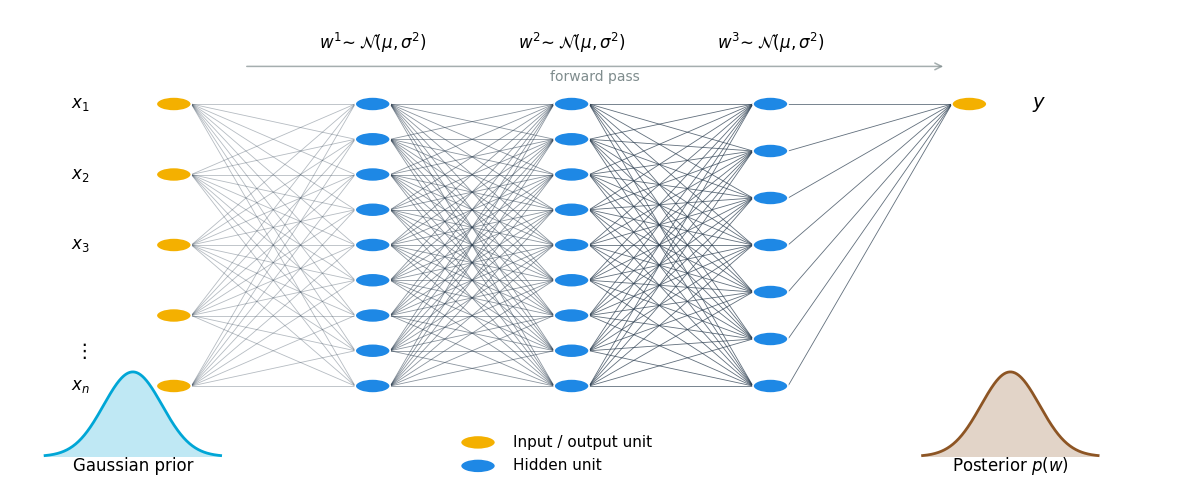

Saved as bnn_schematic_custom.png


In [14]:
# --- BNN Schematic (© you) ---
# Colab/Matplotlib-only, no extra deps.

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Circle, FancyArrowPatch, PathPatch
from matplotlib.path import Path

# ---------- configurable layout ----------
layers = [5, 9, 9, 7, 1]          # [inputs, hidden1, hidden2, hidden3, output]
layer_x = np.linspace(0.14, 0.82, len(layers))
node_r  = 0.015                   # node radius
edge_alpha = [0.35, 0.55, 0.75]   # edge opacity per hidden depth
c_io = "#F4B000"                  # input/output node color (gold)
c_h  = "#1E88E5"                  # hidden node color (blue)
c_edge = "#2C3E50"                # edge color (dark slate)
bg = "white"

# ---------- helper: draw gaussian bump ----------
def gaussian_patch(ax, x0, y0, w=0.11, h=0.12, color="#2EC4B6", lw=2, label=None):
    x = np.linspace(-3, 3, 300)
    y = np.exp(-0.5*x**2)
    y = y / y.max()
    X = x0 + w*(x - x.min())/(x.max()-x.min())
    Y = y0 + h*y
    ax.fill_between(X, y0, Y, color=color, alpha=0.25, linewidth=0)
    ax.plot(X, Y, color=color, lw=lw, label=label)

# ---------- figure ----------
plt.figure(figsize=(12, 5), facecolor=bg)
ax = plt.gca()
ax.set_facecolor(bg)
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.axis("off")

# ---------- place nodes ----------
all_nodes = []  # list of [(x,y,color,is_hidden)]
for li, (Lk, xk) in enumerate(zip(layers, layer_x)):
    ys = np.linspace(0.8, 0.2, Lk)
    for j, y in enumerate(ys):
        is_io = (li==0) or (li==len(layers)-1)
        color = c_io if is_io else c_h
        circ = Circle((xk, y), node_r, fc=color, ec="white", lw=1.2, zorder=4)
        ax.add_patch(circ)
        all_nodes.append((li, (xk, y), color, not is_io))
    # layer header (priors over weights)
    if 0 < li < len(layers)-0:
        if li < len(layers)-1:
            ax.text(xk, 0.93, r"$w^{%d}\!\sim\mathcal{N}(\mu,\sigma^2)$" % li,
                    ha="center", va="center", fontsize=12)

# ---------- draw edges ----------
for li in range(len(layers)-1):
    x1 = layer_x[li]
    x2 = layer_x[li+1]
    ys1 = [p[1][1] for p in all_nodes if p[0]==li]
    ys2 = [p[1][1] for p in all_nodes if p[0]==li+1]
    # opacity changes by depth (to give visual flow)
    if li == 0:
        alpha = edge_alpha[0]
    elif li == 1:
        alpha = edge_alpha[1]
    else:
        alpha = edge_alpha[min(li, len(edge_alpha)-1)]
    for y1 in ys1:
        for y2 in ys2:
            ax.plot([x1+node_r, x2-node_r], [y1, y2],
                    color=c_edge, lw=0.6, alpha=alpha, zorder=1)

# ---------- labels: x1 ... xn ----------
x_in = layer_x[0] - 0.08
ys_in = np.linspace(0.8, 0.2, layers[0])
for idx, y in enumerate(ys_in, start=1):
    if idx <= 3:
        ax.text(x_in, y, rf"$x_{idx}$", fontsize=12, ha="center", va="center")
    elif idx == layers[0]:
        ax.text(x_in, y, rf"$x_{{n}}$", fontsize=12, ha="center", va="center")
    elif idx == 4:
        ax.text(x_in, (y+ys_in[-1])/2, r"$\vdots$", fontsize=14, ha="center", va="center")

# ---------- y (output) ----------
x_out = layer_x[-1] + 0.06
ax.text(x_out, np.mean([p[1][1] for p in all_nodes if p[0]==len(layers)-1]),
        r"$y$", fontsize=14, ha="center", va="center")

# ---------- priors/posterior bells ----------
gaussian_patch(ax, x0=0.03, y0=0.05, w=0.15, h=0.18, color="#00A6D6", lw=2, label="Prior")
ax.text(0.105, 0.02, "Gaussian prior", fontsize=12, ha="center")

gaussian_patch(ax, x0=0.78, y0=0.05, w=0.15, h=0.18, color="#8D5524", lw=2, label="Posterior")
ax.text(0.855, 0.02, r"Posterior $p(w)$", fontsize=12, ha="center")

# ---------- mini legend ----------
leg_x, leg_y = 0.40, 0.08
io = Circle((leg_x, leg_y), node_r, fc=c_io, ec="white", lw=1.2); ax.add_patch(io)
ax.text(leg_x+0.03, leg_y, "Input / output unit", va="center", fontsize=11)
h  = Circle((leg_x, leg_y-0.05), node_r, fc=c_h,  ec="white", lw=1.2); ax.add_patch(h)
ax.text(leg_x+0.03, leg_y-0.05, "Hidden unit", va="center", fontsize=11)

# ---------- subtle arrows (data flow) ----------
arr1 = FancyArrowPatch((0.20, 0.88), (0.80, 0.88), arrowstyle="->",
                       mutation_scale=12, lw=1.1, color="#7F8C8D", alpha=0.7)
ax.add_patch(arr1)
ax.text(0.50, 0.85, "forward pass", fontsize=10, color="#7F8C8D", ha="center")

plt.tight_layout()
plt.savefig("bnn_schematic_custom.png", dpi=300, bbox_inches="tight")
plt.show()

print("Saved as bnn_schematic_custom.png")


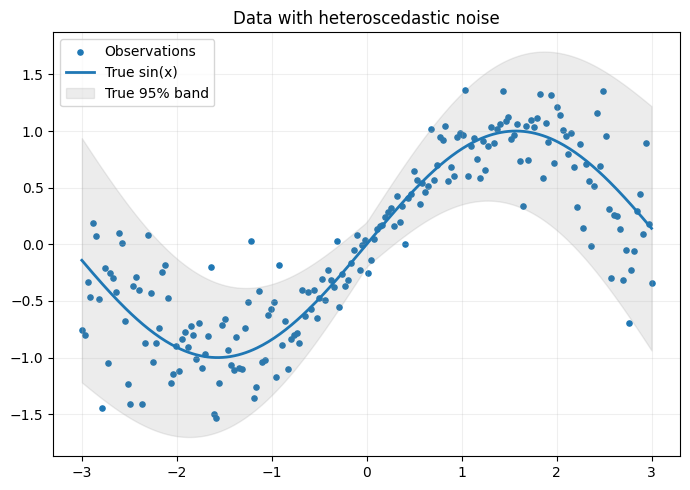

In [25]:
# -*- coding: utf-8 -*-
# Simulation 2: Heteroscedastic Gaussian regression with a Bayesian Neural Network
# - Data: y = sin(x) + sigma(x)*eps,  sigma(x) = 0.10 + 0.15*|x|
# - Model: BNN (1->16->16 shared, two heads for mu and log_sigma), ReLU
# - Inference: VI (AutoLowRankMultivariateNormal) + KL annealing
# - Baseline: Deterministic MLE with the same heteroscedastic likelihood
# - Metrics: MSE, 95% coverage (on observations), average 95% width
# - Plots: Data + true, MLE predictive, VI posterior predictive

#!pip -q install pyro-ppl

import math, time, numpy as np, matplotlib.pyplot as plt
import torch, torch.nn as nn, torch.nn.functional as F
import pyro, pyro.distributions as dist
from pyro.infer import SVI, Trace_ELBO, Predictive
from pyro.optim import Adam
from pyro.infer.autoguide import AutoLowRankMultivariateNormal

# reproducibility
torch.manual_seed(0); np.random.seed(0); pyro.set_rng_seed(0)

# -----------------------------
# 1) Data (heteroscedastic Gaussian)
# -----------------------------
n = 200
X = torch.linspace(-3, 3, n).unsqueeze(1)
sigma_x = 0.10 + 0.15*X.abs().squeeze()     # heteroscedastic noise
y_true = torch.sin(X).squeeze()
y = y_true + sigma_x*torch.randn_like(y_true)

Xg = torch.linspace(-3, 3, 300).unsqueeze(1)
y_true_g = torch.sin(Xg).squeeze()

# -----------------------------
# 5) Plots
# -----------------------------
plt.figure(figsize=(7,5))
plt.scatter(X.numpy(), y.numpy(), s=14, label="Observations")
plt.plot(Xg.numpy(), y_true_g.numpy(), lw=2, label="True sin(x)")
plt.fill_between(X.numpy().flatten(),
                 (y_true - 1.96*sigma_x).numpy(),
                 (y_true + 1.96*sigma_x).numpy(),
                 color="gray", alpha=0.15, label="True 95% band")
plt.title("Data with heteroscedastic noise")
plt.legend(); plt.grid(alpha=0.2); plt.tight_layout(); plt.show()



=== MLE metrics (rounded) ===
{'MSE vs sin(x)': 0.010624, 'Coverage_obs (95%)': 0.95, 'Avg. width (95%)': 1.124, 'Runtime [s]': 12.84}


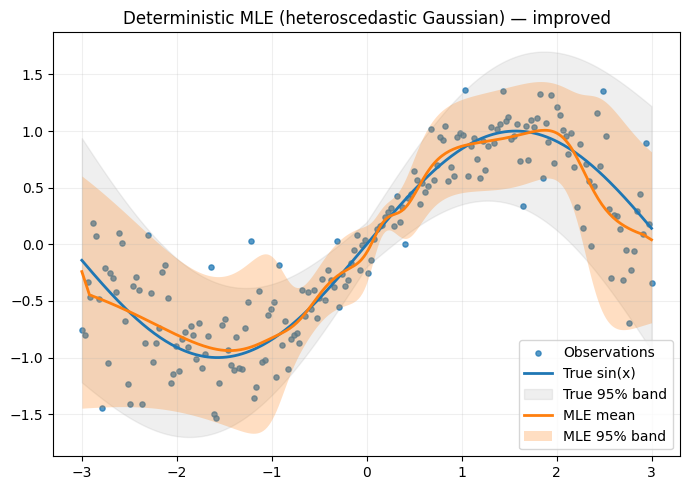

In [21]:
# -*- coding: utf-8 -*-
# Deterministic MLE for heteroscedastic Gaussian regression (improved)
# - Data: y = sin(x) + sigma(x)*eps,  sigma(x) = 0.10 + 0.15*|x|
# - Net: 1 -> 12 -> 12, tanh activations, two heads (mu, log_sigma)
# - Training: Adam(lr=3e-3, weight_decay=5e-4), gradient clip, early stopping
# - Plots: with true 95% band, sorted x, smoothed mean line
# - Metrics: MSE (vs sin), 95% coverage on observations, avg 95% width, runtime

import time, math, numpy as np, matplotlib.pyplot as plt
import torch, torch.nn as nn, torch.nn.functional as F

# reproducibility
torch.manual_seed(0); np.random.seed(0)

# -----------------------------
# 1) Data (heteroscedastic Gaussian)
# -----------------------------
n = 200
X = torch.linspace(-3, 3, n).unsqueeze(1)
sigma_x = 0.10 + 0.15*X.abs().squeeze()     # heteroscedastic noise
y_true = torch.sin(X).squeeze()
y = y_true + sigma_x*torch.randn_like(y_true)

Xg = torch.linspace(-3, 3, 300).unsqueeze(1)
y_true_g = torch.sin(Xg).squeeze()

# -----------------------------
# 2) Helpers (plot smoothing / sorting)
# -----------------------------
def smooth(y, k=9):
    """Simple moving-average smoothing for visualization (k must be odd)."""
    k = int(k)
    if k < 1: return y
    if k % 2 == 0: k += 1
    w = np.ones(k)/k
    return np.convolve(y, w, mode="same")

def sort_xy(x, *ys):
    idx = np.argsort(x)
    out = (x[idx],)
    for arr in ys:
        out += (arr[idx],)
    return out


# -----------------------------
# 3) Plots (with smoothing & true band)
# -----------------------------
fig, ax = plt.subplots(figsize=(7,5))
ax.scatter(X.numpy(), y.numpy(), s=14, alpha=0.75, label="Observations")

# sort arrays by x for a clean plot
xg, y_true_line, y_m, lo, hi = sort_xy(Xg.numpy().flatten(),
                                       y_true_g.numpy(),
                                       y_mle_mean, y_mle_lo, y_mle_hi)

# true heteroscedastic 95% band
sig_true = 0.10 + 0.15*np.abs(xg)
ax.plot(xg, y_true_line, lw=2, label="True sin(x)")
ax.fill_between(xg, y_true_line - 1.96*sig_true, y_true_line + 1.96*sig_true,
                color="gray", alpha=0.12, label="True 95% band")

# smoothed mean for presentation (purely visual)
ax.plot(xg, smooth(y_m, 9), lw=2, label="MLE mean")

# predictive band from model
ax.fill_between(xg, lo, hi, alpha=0.25, linewidth=0, label="MLE 95% band", color="#ff7f0e")

ax.set_title("Deterministic MLE (heteroscedastic Gaussian) — improved")
ax.legend()
ax.grid(alpha=0.2)
plt.tight_layout(); plt.show()



=== BNN-VI metrics (rounded) ===
{'MSE vs sin(x)': 0.009344, 'Coverage_obs (95%)': 0.965, 'Avg. width (95%)': 1.357, 'Runtime [s]': 1136.4}


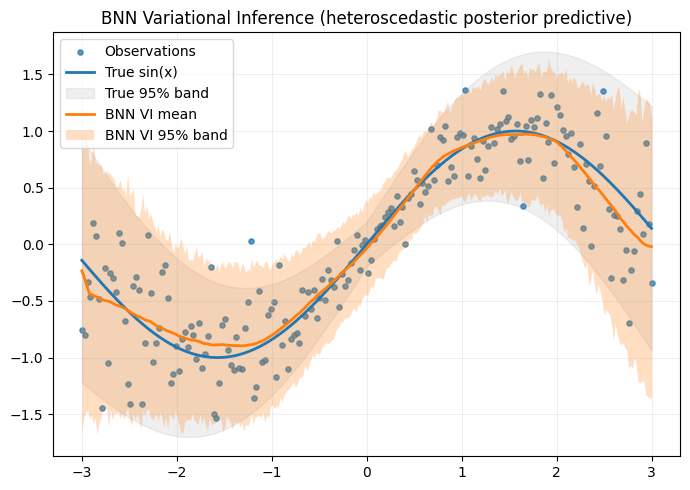

In [28]:





# -*- coding: utf-8 -*-
# BNN Variational Inference (heteroscedastic Gaussian) — clean & stable
# Plots with sorted x and smoothed mean line + true 95% band

!pip -q install pyro-ppl

import math, time, numpy as np, matplotlib.pyplot as plt
import torch, torch.nn.functional as F
import pyro, pyro.distributions as dist
from pyro.infer import SVI, Trace_ELBO, Predictive
from pyro.optim import Adam
from pyro.infer.autoguide import AutoLowRankMultivariateNormal

# -----------------------------
# Reproducibility
# -----------------------------
torch.manual_seed(0); np.random.seed(0); pyro.set_rng_seed(0)

# -----------------------------
# 1) Data: heteroscedastic Gaussian
# -----------------------------
n = 200
X = torch.linspace(-3, 3, n).unsqueeze(1)
sigma_x = 0.10 + 0.15*X.abs().squeeze()
y_true = torch.sin(X).squeeze()
y = y_true + sigma_x*torch.randn_like(y_true)

Xg = torch.linspace(-3, 3, 300).unsqueeze(1)
y_true_g = torch.sin(Xg).squeeze()

# -----------------------------
# 2) Helpers: sorting & smoothing for nicer plots
# -----------------------------
def sort_xy(x, *ys):
    idx = np.argsort(x)
    out = (x[idx],)
    for a in ys: out += (a[idx],)
    return out

def smooth(y, k=9):
    k = int(k); k = k if k%2==1 else k+1
    if k<1: return y
    w = np.ones(k)/k
    return np.convolve(y, w, mode="same")

# -----------------------------
# 3) Bayesian model: BNN with two heads (mu, log_sigma)
#    Priors scaled by fan-in for stability; sigma = softplus + 1e-6
# -----------------------------
hidden = 16
c_prior = 2.0
s1 = c_prior / math.sqrt(1)        # fan-in of layer 1
s2 = c_prior / math.sqrt(hidden)   # fan-in of layer 2
s_mu = c_prior / math.sqrt(hidden)
s_ls = c_prior / math.sqrt(hidden)

def bnn_model(X, y=None, beta=1.0):
    beta = float(max(1e-6, beta))   # avoid zero scale in KL
    with pyro.poutine.scale(scale=beta):
        W1 = pyro.sample("W1", dist.Normal(torch.zeros(1, hidden), s1*torch.ones(1, hidden)).to_event(2))
        b1 = pyro.sample("b1", dist.Normal(torch.zeros(hidden),   s1*torch.ones(hidden)).to_event(1))
        W2 = pyro.sample("W2", dist.Normal(torch.zeros(hidden, hidden), s2*torch.ones(hidden, hidden)).to_event(2))
        b2 = pyro.sample("b2", dist.Normal(torch.zeros(hidden),   s2*torch.ones(hidden)).to_event(1))
        Wm = pyro.sample("Wm", dist.Normal(torch.zeros(hidden, 1), s_mu*torch.ones(hidden, 1)).to_event(2))
        bm = pyro.sample("bm", dist.Normal(torch.zeros(1),         s_mu*torch.ones(1)).to_event(1))
        Ws = pyro.sample("Ws", dist.Normal(torch.zeros(hidden, 1), s_ls*torch.ones(hidden, 1)).to_event(2))
        bs = pyro.sample("bs", dist.Normal(torch.zeros(1),         s_ls*torch.ones(1)).to_event(1))

    h = F.relu(X @ W1 + b1)
    h = F.relu(h @ W2 + b2)
    mu = (h @ Wm + bm).squeeze(-1).squeeze(-1)
    log_sigma = (h @ Ws + bs).squeeze(-1).squeeze(-1)
    sigma = F.softplus(log_sigma) + 1e-6

    pyro.deterministic("mu", mu)
    pyro.deterministic("sigma_pred", sigma)

    with pyro.plate("data", X.shape[0]):
        pyro.sample("obs", dist.Normal(mu, sigma), obs=y)

# -----------------------------
# 4) VI setup: Low-rank guide + KL annealing
# -----------------------------
pyro.clear_param_store()
guide = AutoLowRankMultivariateNormal(bnn_model, rank=30)
elbo = Trace_ELBO(num_particles=10)
optimizer = Adam({"lr": 3e-3})
svi = SVI(bnn_model, guide, optimizer, loss=elbo)

T = 10000                      # total steps
t0 = time.time()
for step in range(T):
    beta = 1e-3 + (1.0 - 1e-3)*min(1.0, step/2000.0)  # KL annealing 0.001 -> 1
    svi.step(X, y, beta=beta)
t_vi = time.time() - t0

# -----------------------------
# 5) Posterior predictive (grid & train) + metrics
# -----------------------------
pred_vi_grid = Predictive(bnn_model, guide=guide, num_samples=600,
                          return_sites=("obs","mu","sigma_pred"))
post_g = pred_vi_grid(Xg, None, beta=1.0)
Ydraw_g = post_g["obs"].detach().cpu().numpy()          # [S, N_grid]
mu_g = post_g["mu"].detach().cpu().numpy().mean(axis=0) # (S,N)->(N,)
y_vi_mean = Ydraw_g.mean(axis=0)
y_vi_lo, y_vi_hi = np.quantile(Ydraw_g, [0.025, 0.975], axis=0)
mse_vi = float(np.mean((y_vi_mean - y_true_g.numpy())**2))

pred_vi_train = Predictive(bnn_model, guide=guide, num_samples=600,
                           return_sites=("obs",))
post_tr = pred_vi_train(X, None, beta=1.0)
Ydraw_tr = post_tr["obs"].detach().cpu().numpy()
lo_tr, hi_tr = np.quantile(Ydraw_tr, [0.025, 0.975], axis=0)
cov_vi = float(np.mean((y.numpy() >= lo_tr) & (y.numpy() <= hi_tr)))
width_vi = float(np.mean(hi_tr - lo_tr))

print("\n=== BNN-VI metrics (rounded) ===")
print({
    "MSE vs sin(x)": round(mse_vi, 6),
    "Coverage_obs (95%)": round(cov_vi, 3),
    "Avg. width (95%)": round(width_vi, 3),
    "Runtime [s]": round(t_vi, 2),
})

# -----------------------------
# 6) Plot: sorted x + smoothed mean + true band
# -----------------------------
fig, ax = plt.subplots(figsize=(7,5))
ax.scatter(X.numpy(), y.numpy(), s=14, alpha=0.75, label="Observations")

xg, y_true_line, y_m, lo, hi = sort_xy(Xg.numpy().flatten(),
                                       y_true_g.numpy(),
                                       y_vi_mean, y_vi_lo, y_vi_hi)
# true heteroscedastic band
sig_true = 0.10 + 0.15*np.abs(xg)
ax.plot(xg, y_true_line, lw=2, label="True sin(x)")
ax.fill_between(xg, y_true_line - 1.96*sig_true, y_true_line + 1.96*sig_true,
                color="gray", alpha=0.12, label="True 95% band")

# smoothed VI mean (purely visual)
ax.plot(xg, smooth(y_m, 9), lw=2, label="BNN VI mean", color="#ff7f0e")

# posterior predictive band
ax.fill_between(xg, lo, hi, alpha=0.25, linewidth=0, label="BNN VI 95% band", color="#ff7f0e")

ax.set_title("BNN Variational Inference (heteroscedastic posterior predictive)")
ax.legend()
ax.grid(alpha=0.2)
plt.tight_layout(); plt.show()






In [29]:

# -----------------------------
# 4) Results table
# -----------------------------
import pandas as pd
df = pd.DataFrame({
    "Method": ["MLE-hetero", "BNN-VI"],
    "MSE vs sin(x)": [mse_mle, mse_vi],
    "Coverage_obs (95%)": [cov_mle, cov_vi],
    "Avg. width (95%)": [width_mle, width_vi],
    "Runtime [s]": [t_mle, t_vi],
})
print("\n=== Metrics (rounded) ===")
print(df.round(4))


=== Metrics (rounded) ===
       Method  MSE vs sin(x)  Coverage_obs (95%)  Avg. width (95%)  \
0  MLE-hetero         0.0106               0.950            1.1243   
1      BNN-VI         0.0093               0.965            1.3567   

   Runtime [s]  
0      12.8389  
1    1136.3996  
